In [52]:
import gensim
import os
import codecs
import re
import string
from gensim.models import Word2Vec
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# articles set from https://www.kaggle.com/nzalake52/new-york-times-articles

with open('nytimes_news_articles.txt', 'r') as f:
    contents = f.readlines()

In [5]:
articles = []
article = ''

for line in contents:
    if line[0:4] == 'URL:':
        if article != '':
            articles.append(article)
        article = ''
    else:
         article = article + line

In [6]:
len(articles)

8887

In [7]:
articles[0]

'\nWASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.\n“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”\nWednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.\n“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”\nThe Mets did not score until the ninth inning, when a last-gasp two-run homer by James Loney off Na

In [37]:
def words(text):
    regex = re.compile('[' + '–' + '—' + '”'+ re.escape(string.punctuation) + '0-9\\r\\t\\n]')   
    text = regex.sub(" ", text)
    words = text.split()
    wordsL = [word.lower() for word in words]
    return(wordsL)

In [38]:
ny_docs = []

for article in articles:
    ny_docs.append(words(article))

In [39]:
ny_docs[0][0:10]

['washington',
 'stellar',
 'pitching',
 'kept',
 'the',
 'mets',
 'afloat',
 'in',
 'the',
 'first']

In [40]:
frist_model = Word2Vec(ny_docs, min_count=1, size=300)

In [41]:
frist_model.wv.save_word2vec_format('ny_model.txt', binary=False)

In [42]:
result = frist_model.most_similar(positive=['man', 'genius'], negative=['woman'], topn=5)
print(result)

[('brilliant', 0.7613193988800049), ('legend', 0.7397980690002441), ('idol', 0.705564022064209), ('protagonist', 0.6986303329467773), ('“americana', 0.6782233715057373)]


In [43]:
from scipy.spatial.distance import cosine

def bais_genius(model):
    man_diff = cosine(model['man'], model['genius'])
    woman_diff = cosine(model['woman'], model['genius'])
    return man_diff - woman_diff

In [44]:
bais_genius(frist_model)

-0.0020801424980163574

In [45]:
wordcount = {}
for doc in ny_docs:
    for word in doc:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
for k,v in wordcount.items():
    print(k, v)

washington 2142
stellar 48
pitching 248
kept 834
the 428535
mets 902
afloat 24
in 161618
first 11093
half 2221
of 185737
last 10916
season 3923
despite 1284
their 19202
offensive 346
woes 67
but 31840
they 23284
cannot 844
produce 408
an 31876
encore 19
pennant 14
winning 1044
if 10688
lineup 361
keeps 247
floundering 11
while 5930
is 59341
nicked 4
bruised 22
and 175764
stretched 97
thin 184
“we 4122
were 18263
going 4965
to 186441
ride 453
our 5860
manager 1292
terry 231
collins 654
said 56691
before 7053
wednesday’s 100
game 5140
“but 1555
we’re 1459
not 29668
riding 206
it 47145
right 3933
now 8291
we’ve 630
got 2777
as 42667
many 8119
problems 1148
with 51227
we 12306
do 8226
anything 1324
loss 896
nationals 188
was 55377
cruel 76
for 69650
already 2226
limping 13
steven 280
matz’s 9
place 3245
spot 575
starter 211
logan 75
verrett 43
allowed 1226
two 12836
runs 1251
over 10357
five 3356
innings 573
even 7476
that 89300
too 3711
large 1883
a 201760
deficit 205
mets’ 211
overcome 1

unlikely 460
“for 440
“the 7260
trend 273
wasn’t 999
reverse 139
talk 1234
store’s 30
circulated 70
neighbors 280
officially 237
told 3584
end 3191
imminent 70
love 1867
what 11486
comes 1313
doesn’t 1452
sense 1290
anymore 242
corporate 620
sales 1363
professional 649
services 1294
focused 748
small 2353
medium 145
size 694
businesses 643
area 1626
experienced 339
afternoon 694
word 836
reached 864
disappointed 200
alan 175
wolk 1
repair 134
keyboard 48
damaged 189
spilled 48
coffee 396
here 4177
forever 204
guys 667
know 3964
stuff 477
trust 625
kerry 251
elson 2
decade 805
intern 28
figure 863
how 7323
worked 1600
omaha 54
united 6302
states 6454
olympic 624
swimming 194
trials 227
spectacle 106
michael 1145
phelps 107
strapped 46
sport 552
broad 426
climbed 179
summit 147
athens 49
nights 213
beijing 529
finals 634
light 991
show 3858
centurylink 9
ticket 448
scalpers 7
crowds 169
fewer 481
athletes 649
extending 61
careers 138
college 1783
endorsements 44
least 2542
entrant 13
met

anthony 277
workouts 39
changes 986
hoped 435
studied 229
visiting 466
share 1189
insights 130
positioning 32
“simple 5
“nothing 72
tape 141
couple 1325
thought 1829
he’s 1457
veteran 349
rejoiced 4
apparent 216
adriano 8
espaillat 53
democratic 1577
primary 1079
choose 395
successor 137
representative 537
charles 396
b 2434
rangel 48
scene 738
tone 305
dozen 663
blocks 266
harlem 210
leaders 1357
began 2443
grapple 35
seven 1630
neighborhood 877
represented 363
congress 1056
results 1023
draw 518
curtain 58
passing 295
culture 861
rudy 13
williams 826
substance 136
abuse 408
counselor 37
sitting 588
friends 1496
folding 42
chairs 173
sidewalk 121
malcolm 73
boulevard 69
wearing 576
bright 294
newsboy 2
hat 149
matching 105
pants 132
worried 443
espaillat’s 14
mean 834
“harlem 11
cry 128
reginald 4
jones 621
chimed 13
face 1820
perpetual 28
ground 899
identity 543
senator 1334
seeking 780
dominican 116
immigrant 210
election 1698
lead 2052
votes 492
closest 177
competitor 100
l 1865
t 

acquaintances 17
interest 1390
felony 114
count 375
receiving 264
bribe 12
admitted 256
filing 239
document 230
false 220
stemmed 31
joint 291
schneiderman 79
pigeon’s 8
activities 371
plea 96
bench 314
cooperate 104
appear 662
unspecified 43
matt 299
mittenthal 4
spokesman 1017
repeatedly 439
appellate 52
division 495
associate 349
judgeship 3
“normally 11
wrote 2483
email 1117
december 605
quest 101
appointment 144
lasted 156
“wonder 2
apparently 381
straight 732
“unc 1
how’d 1
“bunch 2
happening 339
albany 136
talked 404
u 1670
replied 193
“let’s 97
date 546
preparing 239
detail 208
governor’s 137
occur 91
“haven’t 2
heard 850
peep 10
appp 1
div 1
kelly 295
governor 640
“appointees 1
reviewed 162
approved 491
judicial 135
screening 161
committee 1150
michalek’s 1
advanced 305
consideration 128
various 592
committees 135
campaign 3534
finance 533
improprieties 7
sometime 68
rochester 41
golisano 1
brokered 31
coup 92
capitol 174
disarray 26
erie 25
county 1006
organization 1103
re 54

annette 14
tadeo 1
slammed 38
positions 369
hypocritical 13
“big 56
oil 1280
gas 615
lobbyists 47
filling 153
coffers 22
offshore 126
drilling 39
strickland 4
notes 340
slams 18
upstate 98
newspaper 580
stefanik’s 1
acknowledge 174
delay 224
implementation 21
burning 147
plants 357
representing 245
acid 45
rain 404
midwest 55
paper’s 109
editorial 163
observers 85
comparisons 66
steyer 22
environmentalist 17
donor 129
nextgen 7
pledged 250
disavowed 8
comparison 146
“from 106
grading 6
curve 64
fairly 238
objective 77
ads 284
note 498
candidates’ 13
lush 61
fields 295
sparkling 46
skies 43
explicitly 89
term 1152
acknowledges 54
supports 179
divisive 74
actually 1144
phrase 172
“climate 12
‘clean 3
energy’ 1
tells 234
voter 203
environment 440
deflects 3
britain 1410
proclaimed 62
argue 331
elitist 7
undemocratic 10
regain 66
quit 181
outright 89
scratch 62
union’s 118
criticisms 46
bloc 323
straightforward 82
elections 519
representation 76
meaningful 128
define 145
usually 707
techni

ogge 2
report’s 28
illegal 393
foundation 516
timing 169
appears 630
highlight 136
require 542
refer 103
contributions 189
liberal 347
campbell 92
newman 52
governed 54
annastacia 1
palaszczuk 3
galilee 2
basin 41
additional 609
tons 89
thermal 37
exports 106
environmentalists 37
damage 447
barrier 131
reef 75
project’s 42
developer 227
adani 4
conglomerate 61
india 473
donated 136
lynham 2
resources 459
meetings 355
ministers 115
invest 188
rail 112
object 151
palaszczuk’s 1
greg 108
bigger 503
ships 113
dock 65
abbot 8
within 1380
queensland’s 2
northeast 146
coast 438
dredging 15
spoils 13
dumped 24
outcry 58
scientists 520
conservationists 29
reversed 93
dredge 10
adani’s 1
“influenced 2
encouraging 169
successive 40
ignore 123
suitability 3
operate 224
lowered 67
reporting 356
requirement 136
transparent 79
restored 106
weigh 123
proposed 580
extensive 189
consultation 35
impact 640
conditions 561
lease 144
applications 169
vacation 173
adnani 5
linc 2
karreman 2
quarries 3
sibelc

understanding 314
helps 347
vulnerability 67
marks 155
uptick 29
lasting 112
kurs 1
evocative 18
gestures 36
reminds 54
collective 268
memory 310
commissioned 110
playwrights 27
fascinating 89
dramatic 184
privately 170
surveymonkey 3
karma 12
specialist 152
connect 150
caregivers 22
stripes 55
shareholder 217
alphabet 55
alphabet’s 12
gv 4
tends 138
“growth 10
footsteps 33
silver 396
lake 373
preferred 194
shares 780
babysitting 5
housekeeping 12
pet 111
manage 256
taxes 392
nannies 14
homepay 1
com’s 13
sheila 19
lirio 1
marcelo 17
bringing 388
tap 171
“through 26
eventually 854
prompted 318
laela 1
sturdy 36
inquire 12
“care 4
exemplifies 15
“we’ve 296
criteria 63
sized 35
terms 805
convertible 21
conversion 50
receive 654
backer 26
matrix 5
dilution 4
morgan 237
latham 37
watkins 36
gives 469
couture 131
verged 4
literally 183
couturier 4
dior 54
teenager 254
normandy 13
fortuneteller 3
“mystified 1
prediction 53
revealed 351
“couture 4
confessions 33
posthumous 10
golbin 10
curato

argues 140
deeply 451
rarity 36
infighting 24
“really 50
closer 458
shaping 58
intentional 53
shapiro 52
columbia 366
wolfe’s 16
discoveries 30
illuminate 16
mattered 57
“anytime 21
substitute 65
solid 222
refute 10
skeptics 28
exasperation 28
scholars 126
stratford 16
avon 14
‘shakespeare 1
player’ 1
smoking 164
archives 58
heralds 6
researching 56
granting 38
coats 49
arcane 18
literary 135
tread 18
“looking 33
minutiae 13
unbearable 16
owe 52
debt 766
gratitude 41
wading 32
wondering 96
edited 152
nigel 33
ramsay 48
curated 61
heraldry 1
startled 36
sketch 49
“shakespeare 14
dated 84
copy 189
authorship 6
unreliable 40
unremarked 2
digging 59
forgotten 149
depictions 32
heraldic 2
alphabets 1
ordinaries 1
speculated 43
renewed 164
father’s 223
behalf 269
proves 31
wryly 16
underlines 18
contemporaries 19
abundantly 8
obtaining 59
berkeley 102
documented 82
persuasive 26
“helps 4
context 195
minted 20
jonson 3
humour 1
bumpkin 1
motto 27
“not 346
mustard 34
dig 68
brooke 44
herald 57

missing 451
labored 22
reassure 49
conservatives 204
bailout 103
island’s 102
payments 301
outsiders 64
crucially 23
creditors 81
nonpayment 3
retroactive 5
breathing 97
crippling 39
devise 25
budget 568
stakes 226
owes 43
billions 222
prompt 74
taxpayers 81
dime 20
reforms 133
bill’s 45
delaying 48
virginia 445
miners’ 6
industry’s 86
travails 13
menendez 8
fault 131
provisions 110
appointees 16
sponsored 153
workers 1503
limiting 112
counterproductive 10
stronger 259
opponents’ 17
motions 23
excluded 60
compromise 142
hung 185
rico’s 48
padilla 26
“descent 1
dissenters 16
problematic 66
unpopularity 18
disconnect 23
wyden 16
austrian 50
waltraud 1
hollinger 1
husband 781
valie 4
export 78
nom 10
guerre 7
cigarettes 177
village 706
marieluise 1
hessel 7
collector 118
benefactor 25
bard 36
annandale 3
export’s 8
stared 37
worriedly 2
wikipedia 10
maiden 30
somewhere 204
translucent 16
fashionable 43
tennis 451
dyed 29
elevator 140
explaining 156
spectral 6
registers 14
comedy 398
films

giegold 1
combine 94
pesticide 21
forming 61
pain 548
pesticides 30
hugh 43
grant 245
monsanto’s 14
update 111
“discussions 2
combinations 42
crops 82
geographies 6
sustainability 43
agriculture 114
engage 208
pursue 258
enhancing 72
abandoned 221
pursuit 125
swiss 230
agricultural 84
manufacturer 81
mourning 47
ends 264
embodied 36
alexandra 38
silber 9
extremes 22
hodel 7
“fiddler 28
immersed 22
thoroughly 73
tevye’s 1
boards 180
siberia 17
suddenly 363
marrow 40
morphed 19
blown 89
anatevka 4
pegasus 7
publish 87
hodel’s 1
shtetl 3
stuns 1
dairyman 2
tevye 4
announces 20
marry 86
perchik 6
tutor 21
kiev 32
exiled 19
silber’s 2
siberian 13
arouses 3
unmarried 15
remembers 100
exchanges 93
tzeitel 4
flashbacks 9
narrative 229
sholom 2
aleichem 1
musical 706
ancestors 44
incredible 139
dimensions 42
“arlington 1
eliza 7
doolittle 8
oldest 202
revisited 15
iris 19
blasi 7
“white 34
grief 83
memoir 124
isherwood’s 2
‘fiddler 4
roof’ 3
tzeitel’s 1
rewriting 10
capitalizing 18
ventures 113

feedback 73
relativism 1
chord 28
schoolers 8
algorithmic 9
selection 250
reinforce 40
newsroom 81
click 87
exist 240
collide 11
sway 67
consuming 83
uh 15
courted 16
publishers 125
tamp 12
algorithm 38
favorably 32
promote 247
feeds 62
tweaking 12
undertakes 1
vastly 48
upstarts 13
buzzfeed 56
vox 17
bell 138
tow 24
journalism 171
highlights 144
ownership 185
referral 18
publisher’s 4
interact 70
readership 18
streams 65
experimenting 42
tailored 65
debuted 45
dependent 99
parse 19
ly 7
analytics 51
publishers’ 3
properties 310
emphasizes 45
deepen 24
characteristic 34
“facebook 10
child 871
we’ll 340
kinsey 3
wilson 269
tweaks 20
toledo 12
exstreamist 1
monthly 218
halve 2
unilaterally 16
zynga 4
downturn 84
gaming 57
computing 113
masse 13
desktop 30
earliest 91
effectively 313
“worried 2
decreased 41
ecosystem 43
albert’s 2
picturesque 29
rolling 204
tractors 9
tilling 3
soil 132
barn 72
sunlight 58
farmbox 2
garage 138
seattle 243
microgreens 3
vertically 11
stacked 49
trays 17
hy

lawsuit 733
invalidated 8
ineligible 32
graduation 135
dropout 16
essentially 328
compelled 56
colleges 304
screened 55
“full 35
hallways 37
“their 70
‘that’s 28
‘early 1
elevated 108
mount 192
rushmore 11
sacrifice 95
“early 15
labels 97
assign 14
unanswered 36
implies 28
bequeathed 7
benevolence 4
tooth 35
survival 122
depended 21
caretakers 16
destroy 113
siphoning 7
ruin 43
arenas 21
supersonics 10
schulman 14
walter 119
claiming 150
penalties 156
violated 185
antitrust 103
rockets 110
drafted 136
hardship 23
blizzard 31
injunctions 4
sonic 20
misinterpreted 14
egotism 1
relevant 163
arising 17
laughable 8
deepening 38
supple 10
thanks 292
isiah 7
iverson 16
dominique 24
wilkins 3
hakeem 11
olajuwon 5
barkley 11
karl 63
scrapped 21
noneconomic 2
ineligibility 3
michele 38
sensing 27
atelier 14
chooses 48
altered 68
jimmy 126
choo 11
unveil 20
heel 25
height 130
crystal 154
clip 93
ons 14
bracelets 15
decorate 20
clutches 10
toe 72
ankle 111
laced 53
stilettos 8
skater 19
luxe 16
sa

slouched 4
circular 47
parrot 12
feather 17
palette 40
droopy 5
tighter 50
blotchily 1
patterned 37
loosely 50
wears 105
radiant 17
plumage 3
exuberant 32
fabulous 39
spotlights 7
grinding 47
alfresco 3
abe 99
chabon 6
pronounced 142
pulitzer 94
follower 11
chore 7
wages 206
mitzvah 15
raf 19
simons 43
acne 8
studios 191
gosha 5
rubchinskiy 13
confessed 48
pitched 258
gq 15
fascination 60
“little 46
hypebeast 2
compare 99
‘little 3
buddha’ 1
keanu 11
reeves 19
clutch 30
monks 37
reincarnated 4
lama 36
margiela 10
insisted 289
convincing 71
ysl 7
‘no 55
luka 11
sabbat 1
attendee 13
wandered 38
exchanged 62
processing 81
wishers 6
carefree 14
hedonists 1
sweat 87
happiness 63
joy 208
blotchy 2
blots 1
stains 6
imaginatively 6
uncertain 118
poetic 43
raining 17
glance 46
seating 53
“raining 1
insider 211
liptak 3
preparation 121
proceeds 97
stately 27
thesis 36
justices 161
puzzled 36
pileup 6
print 298
insistent 14
senses 30
briefs 21
interviewing 35
litigants 7
intimately 19
pedestrian 

katschnig 1
ricco 31
maresca 1
leopold 7
strobl 3
günther 6
schützenhöfer 1
strobl’s 1
archaeologists 26
mapmakers 2
extermination 8
lithuanian 5
ponar 5
burial 61
pits 32
graves 91
holocaust 70
radar 112
scan 54
passageway 8
structure 354
mouth 212
subsequently 50
unmarked 24
survivor 70
pit 113
freund 18
archaeologist 23
unravel 26
pbs 40
nova 84
ashes 40
paneriai 1
vilnius 5
jerusalem 121
systematic 52
assistants 49
chambers 60
collaborators 54
soviets 14
exhume 2
bury 29
leichenkommando 1
“corpse 1
corpses 35
spoons 10
passover 16
darkest 17
crawled 20
noise 166
alerted 51
guards 276
dogs 389
survivors’ 5
excavate 4
disturb 16
noninvasive 3
resistivity 2
tomography 4
subsurface 2
clay 334
disturbances 16
tool 171
pinpoint 34
tunneled 1
bauman 2
geophysicist 1
worleyparsons 1
fm 15
jol 1
geology 11
anthropology 17
eau 4
reflections 19
archaeological 36
landscapes 35
seligman 9
antiquities 14
bustling 47
rubble 61
artifacts 64
inconsistencies 16
harvey 318
backbone 22
dinged 4
espino

sq 17
ft 18
wholesale 105
pantry 34
jencap 1
tenant’s 11
maslin 1
landlord 112
realty 84
landlord’s 12
godard 23
cody 25
dyer 74
ops 41
separately 104
leases 50
dividable 1
aac 1
korren 1
jonata 1
dayan 4
hagerup 1
evo 1
scramble 42
fallen 296
derivatives 27
securitized 3
mortgages 97
clsa 2
refers 95
c’s 10
ails 6
peripatetic 13
superlow 1
squeezing 27
locus 7
bankers 116
zurich 51
frankfurt 58
destinies 5
heyday 33
peddling 16
anshu 2
jain 7
dougan 2
boardrooms 8
unceremoniously 9
chancy 1
averse 28
offloading 1
leveraged 33
herculean 3
compensated 38
resistant 73
tidjane 9
thiam 62
revolt 51
valuing 13
desks 21
“mark 4
vernacular 26
piles 49
francs 61
berenberg 4
exposures 7
suisse’s 11
barclays’ 15
reflecting 127
soros 13
wager 13
marshall 92
wace 1
threshold 83
riepe 2
tübingen 4
drying 45
uniquely 38
“iron 7
mills 130
ferroalloy 1
gleam 5
negotiator’s 1
steelworking 1
culprit 34
innovations 43
productivity 104
contraction 16
counterbalanced 4
dwarfed 16
nostalgia 58
disconnected 

touches 69
rans 4
rarefied 35
author’s 18
connects 67
halves 9
domain 34
physics 46
faults 13
pretentious 8
thiel 121
gawker 238
pretensions 4
principled 14
counterculture 5
renouncement 1
staid 8
reactionary 18
mangles 1
directionally 1
verdicts 32
conclusions 95
deconstruct 7
amassed 36
fuller 34
rejoice 7
invidious 2
hegemony 2
mckinsey 24
implicated 49
suffer 122
cautionary 28
trenchant 4
manuscript 34
pored 10
clues 81
sail 36
monthlong 21
forsythe 20
glorya 3
kaufman 32
“fall 4
“focus 8
choreographer’s 3
roman 286
choreographic 11
“blake 1
costumes 80
“forsythe 1
dorothy 24
chandler 15
pavilion 58
ballets 37
“artifact 3
suite 173
vertiginous 12
thrill 53
exactitude 1
“pas 2
reworked 13
“juliet 1
tennessee 129
summitt 17
summitt’s 1
vols 1
alzheimer’s 100
dementia 74
chasing 79
raccoon 9
labrador 9
retriever 15
parkinson’s 75
malady 5
cure 56
dignity 69
tempts 2
retreat 105
diseases 114
courageous 17
taboo 27
legacies 15
pity 32
knoxville 20
sentinel 17
robs 5
abilities 58
eats 37

yell 33
dormitories 5
wancheng 3
dormitory 14
subsists 1
pumpkin 19
porridge 9
boastful 7
brawny 7
drained 30
landslide 46
solidly 18
looms 41
contrasts 30
iconoclastic 5
tempestuous 7
persona 68
repelled 13
unqualified 16
dwight 39
eisenhower 18
lyndon 26
nixon 83
reagan 153
narrowed 33
realignment 9
hardened 23
nominees 125
“party 21
rigid 29
abramowitz 6
emory 17
precludes 4
comforts 10
disheartened 6
uneven 42
paltry 19
cave 46
dole’s 7
commerce’s 3
lifting 115
broadest 7
temperamentally 7
unfit 43
scowcroft 3
buttressed 6
reasoning 40
fiery 72
stoke 25
kaine 11
selecting 47
axelrod 28
bogged 22
costliest 4
grasp 58
acute 72
gowdy 27
harshly 30
reiterated 73
thwart 44
exhaustive 11
chronology 8
dispute 320
stinging 30
mitigate 33
dereliction 5
bolstered 43
contradict 16
“partisan 4
tinge 7
inadvertent 12
classified 131
pompeo 5
addendum 4
harsher 27
■ 154
authorization 57
marines 74
conflicting 42
loyal 124
“off 13
exerted 18
obstruct 12
scant 35
fundamentally 61
consulates 4
maxim

instagrammer 2
beard 76
bartender 54
maxwell 28
britten 7
williamsburg’s 4
maison 45
cfda’s 3
aguynamedpatrick 1
reimagine 14
minibars 3
roxy 6
“patrick 1
hack 34
usable 9
versatile 37
backyard 92
paloma 3
gordy’s 2
brine 4
paloma’s 1
capilla 1
jalisco 2
melds 4
mezcal 6
curaçao 2
watermelon 38
grapefruit 23
tending 23
bolder 11
zested 1
maldon 3
concoction 17
½ 52
ounces 29
amaras 1
¾ 8
ferrand 1
pickle 7
garnish 12
pour 59
shaker 13
grate 7
microplane 1
herradura 1
tequila 15
waese’s 2
greene 69
bookcase 3
piled 75
adventures 45
meteorite 21
finger 132
pistachios 13
sensibility 55
waese 3
cornejo 9
hostem 3
someplace 15
tokyo’s 10
fantastical 26
swan 21
emerald 13
necklace 24
pendant 13
reproduced 13
sketches 44
naïveté 11
mushy 7
molds 16
manhattan’s 31
melted 37
prongs 1
“season 3
maintains 60
respectfully 18
pizzas 25
pastas 10
handsome 76
daroco 1
eatery 9
gaultier’s 2
space’s 6
untouched 24
trattoria 3
ceilings 80
velour 5
banquettes 3
mezzanine 12
diners 50
servers 52
breton 10

pinochet 5
barrientos 14
deltona 2
daytona 13
bragged 8
accomplished 103
songwriter 71
salvador 32
allende 3
injustice 49
“bob 5
dylan 58
widow 53
joan 57
manuela 24
profession 70
remarry 2
chadbourne 3
parke 4
violators 12
faculty 182
autopsy 48
exhumed 6
navarrete 2
boasted 55
retaliation 54
dictatorship 47
miguel 64
vásquez 6
absentia 9
defendant’s 25
calderon 14
“live 48
landscaper 3
evade 47
tejas 1
verdes 6
regiment 8
baez 12
load 81
suicides 27
assaulted 63
navia 2
detainee 13
“you’ll 14
guitar 165
severely 65
“víctor 1
erica 33
osorio 34
almudena 1
bernabeu 1
“profoundly 3
sadness 46
horrors 31
bullying 57
pulverized 5
heimir 2
hallgrimsson 2
dentist 34
wayne 101
rooney 42
ragnar 1
sigurdsson 4
krasnodar 2
kolbeinn 2
sigthorsson 3
nantes 6
firepower 16
obscurity 23
roy 109
hodgson 14
humiliating 21
raheem 2
sterling 53
tripped 20
goalkeeper 109
hannes 3
halldorsson 2
volleyed 3
kari 10
arnason 1
decisive 102
keeper 22
aron 7
gunnarsson 2
cardiff 12
tore 57
dancing 202
reykjavik

sweetness 31
songbird 4
wonderfully 33
wrists 17
monologue 21
dickens’s 3
caricature 23
beneficence 2
fairies 4
startling 63
heroine 29
aurora 36
floods 45
courtiers 1
pageboys 1
suitors 21
pomp 13
circumstance 35
epitome 10
dashes 11
jumps 31
ratmansky’s 9
marvelous 33
goat 29
princes 12
roses 65
adagio 5
composure 22
eventful 6
logically 9
paces 14
partnering 16
pricks 2
masterpiece 46
puss 2
o’ 16
engagingly 2
narratives 59
immortal 16
cinderella 4
fireside 3
slipper 2
ballroom 60
bellows 10
rhythmically 5
puff 15
gem 35
figuring 59
sealed 72
individuals’ 8
jewels 27
anonymously 26
fetched 22
oppenheimer 17
millionaire 18
philip 131
auctioneer’s 1
weighing 68
differential 19
anish 4
aggarwal 2
gemdax 1
lucara’s 1
julius 9
baer 8
dubai 47
tycoon 27
lau 28
burnishes 1
“sales 1
scarcity 19
prestige 42
cowen 7
tiers 11
lesedi 1
rona 4
setswana 1
cullinan 7
pretoria 17
vii 11
windsor 39
castle 107
monarch’s 3
scepter 3
rapaport 2
optimum 5
distribution 147
chart 81
“views 42
eminem’s 2
“

kissinger’s 2
fury 71
recounts 24
irreparably 6
“lost 18
schaffer 11
meted 7
retrospect 33
bulgaria 14
perilous 36
hannah 107
gurman 1
extensively 53
“quelling 1
deflating 15
gowher 1
rizvi 3
sidelining 6
spiky 8
unwelcome 21
lighted 16
criticize 63
amusing 37
visualization 14
annoyed 22
worthwhile 25
ethnicity 50
showrunners 6
textual 2
dragons 33
yuyu 2
dali 9
hui 2
hectic 10
tingyu 2
“picking 9
quarrels 9
xiaobin 1
unrest 53
accusation 38
sichuan 26
yunfei 3
remembrance 19
tiananmen 43
guizhou 7
gleaned 20
collate 3
deleted 46
censors 17
foshan 1
slows 19
bulletin 27
unpaid 58
“citizen 8
invaluable 24
cataloging 8
crothall 1
“by 91
‘shooting 2
messenger’ 1
postindustrial 5
excelling 4
bastions 5
ethno 2
nationalists 25
secularism 10
coasts 9
aberdeen 10
butte 2
rhode 83
burns 144
underperform 7
penchant 39
offend 26
overperforming 1
costco 22
blossom 23
thrive 79
invus 3
greycroft 2
grocers 7
rejecting 64
gunnar 6
lovelace 2
philanthropic 34
impulse 55
lovelace’s 1
stakeholder 4
jer

eeriness 1
religiosity 10
articulated 18
“jane 10
dramas 51
pbs’s 3
pov 1
fantasies 17
perpetrated 14
mannered 15
optometrist 1
brother’s 31
movie’s 31
unnerving 15
stillness 12
unremorseful 1
trailer 69
scott’s 22
castillo 25
press’s 4
pedals 7
darting 12
monastic 6
sundancenow 1
doc 33
kathryn 29
shattuck 2
dispatch 26
queso 8
fundido 2
chorizo 5
jalapeño 8
cilantro 16
flecked 12
grilled 113
peaches 11
mallmann 1
superfancy 1
canned 24
bodega 14
sautéed 17
bagel 25
diner 58
burgers 43
smalls’s 1
smothered 17
crab 53
gravy 18
reverie 8
jeweled 6
flower 118
horseradish 9
crema 6
teff 1
polenta 5
toasted 27
hazelnut 5
gander 10
“turner’s 2
whaling 16
frog 29
embryos 41
tadpoles 4
hatching 15
hatchers 1
treefrog 2
twig 2
wasp 11
wriggle 8
warkentin 4
gobble 4
wasps 8
nest 104
bald 41
eagles 52
kristina 20
warkentin’s 1
seid 1
biology 69
panama 158
smithsonian 40
poked 35
electron 7
microscopy 6
emit 24
enzymes 10
digest 18
membrane 10
blister 7
digesting 3
thrash 5
snout 8
embryo 28
soft

bismarck 8
battleship 2
oceanic 24
atmospheric 36
expedition 28
mckinnie 1
explorers 11
captivated 32
controller 10
shipwreck 11
dives 5
twitch 18
networking 46
openexplorer 1
legitimately 11
shoestring 5
plaque 42
tangling 5
tether 2
reconstruct 15
furrow 3
mailman 4
tahoe’s 1
drowning 29
ballyhooed 4
prep 54
tutoring 9
pencils 9
jaundiced 2
“stereotype 1
psychologists 25
polemic 6
administers 17
revamped 26
iterations 11
pretested 1
welk 2
tutors 8
‘wait 6
signet 3
taker 6
grappled 27
asians 30
poorer 45
persist 33
replicated 29
test’s 5
“essay 1
slavery 86
abolitionism 2
catharine 3
beecher 8
angelina 9
grimké 2
abolitionist 25
passages 40
divine 27
wield 27
“length 1
beecher’s 2
“separate 5
spheres 14
placement 64
aronson 6
steele 16
pioneered 28
couch 108
“cognitive 5
bothered 62
mcglothlin 3
segregationist 5
integrationist 2
wallace 68
thurgood 5
berthold 1
“weird 6
dissonance 14
wrestle 25
cowan 24
misunderstood 25
reinforcements 18
“girls 51
gyory 2
catskills 12
eliot 18
spitze

darker 41
pixar’s 5
“finding 36
dory 22
droves 12
shallows 5
undiscriminating 1
sputtered 6
dud 7
comscore 22
compiles 11
cater 40
angelababy 1
stinker 1
aided 35
“smoke 2
sony 112
costing 53
originality 13
multiplexes 5
greenstein 6
sony’s 12
stx 4
digit 65
gloated 2
heartening 12
libertarian 55
robby 28
mook 11
manafort 101
stupor 7
upstart 20
summarily 11
squashed 5
griezmann 30
minnow 3
jaws 15
whale 59
indisputably 7
pogba 5
hesitate 42
dimitri 17
payet 12
robbie 33
victorious 19
atone 4
dribbles 5
blaise 2
matuidi 2
giroud 21
bulldozed 6
hendrick 4
pixies 3
ticked 28
frothing 2
“kind 29
timidity 1
trepidation 23
crisply 8
fluidly 3
bacary 2
sagna 2
looping 17
darren 34
randolph 21
nestled 30
slotted 11
cared 71
“another 19
o’neill 104
wistfulness 3
unraveling 28
legged 16
blatant 21
payback 7
adjustment 40
kingsley 7
coman 2
duffy 42
bubbly 12
squelched 3
grinned 8
greeting 26
perked 12
saul 26
byrd 36
aliases 5
props 29
knack 32
wallets 20
builder 32
singleton 9
handicapped 5
ne

chatham 9
harding 8
needlepoint 4
bowdoin 2
dartmouth 33
specializing 83
cybersecurity 32
alicia 65
jana 2
salzer 8
allyson 3
hayden 41
salzer’s 1
ordained 33
ministries 30
“back 29
rita 20
colonia 3
assesses 7
licensure 1
muriel 6
wilbraham 1
solomon 24
kimberly 18
lyn 5
alvin 15
coles 12
melville 17
maudlin 4
piscataway 2
ayer 6
adjunct 29
jfk 1
muhlenberg 2
plainfield 2
jefferies 26
debra 26
groom’s 113
alcorn 3
francesca 13
vega 31
neamonitis 3
archdiocesan 2
trinity 48
vlahos 1
dennis 84
strouzas 1
assisted 77
nt 3
tonka 1
lakehouse 1
litsa 1
manhasset 7
godfrey 14
peru 72
congregational 3
dawedeit 1
scottsdale 15
rigney 3
stepdaughter 27
tydings 1
magna 54
cum 137
laude 131
audie 1
alma 24
mater 24
politely 33
correspond 29
emailing 13
amelia 6
jensen 22
christos 3
sembos 9
keeler 5
wiliams 1
providence 33
bachelor’s 23
evangelos 1
bridgeport 19
whereupon 2
blathering 1
playfully 22
scrabble 5
‘o 31
norfolk 26
gin 43
martini 15
beatles 31
progressing 9
halloween 17
strutting 5
“j

scouting 70
compress 8
vise 3
hammock 6
harbaugh 22
“found 3
ezekiel 7
elliott 99
alfred 57
cramp 3
‘i’ve 8
turbin 2
sharpens 3
morris’ 1
raiders 37
jaguars 10
“ball 1
mogadishu 4
somalia’s 6
naso 1
hablod 1
shabab 29
somalia 30
deafening 13
abdikamil 1
moalim 1
shukri 1
tactically 6
mohamud 1
bookkeeper 3
clan 37
offensives 8
auspicious 15
martyred 6
pineda 95
dellin 41
betances 88
pineda’s 13
changeup 29
punchouts 1
passive 29
pressly 3
fielder’s 8
booted 7
envision 36
ike 11
refsnyder’s 11
ref 8
revert 17
alleviating 4
cortisone 15
teixeira’s 19
spasms 15
auburn 12
gbinije 11
“definitely 11
bower 9
gbinije’s 2
timelines 10
intrigues 5
positionless 1
sparingly 9
duke’s 7
krzyzewski 4
syracuse’s 9
boeheim 8
famers 8
professionalism 20
ideologies 7
dislocations 2
sprouted 12
sectarianism 7
upending 15
symbolizes 9
weakens 7
diluting 7
ivo 20
daalder 1
corrosive 8
symbolism 28
“history 13
liqun 2
nurtured 26
discord 25
foment 4
seizure 29
crimea 32
respecting 25
“vladimir 2
garton 13
pa

repairman’s 1
doormen 11
beholden 11
op’s 2
ledger 29
sympathize 14
tenancy 5
fiscally 8
paltz 1
defray 5
finer 14
freedland 5
ekroth 2
elliman 37
concise 8
“members 7
bickering 7
thereby 26
pitfalls 21
polls’ 4
consist 27
frenzied 24
underappreciated 16
constitute 39
declan 5
kearney 2
reunification 6
“prepare 3
overlap 38
algeria 20
algerians 2
tajiks 2
countless 111
invasions 5
“unify 1
yugoslavia 15
linguistic 16
palestine 26
nationalities 17
coexist 25
uighurs 7
kingdom’s 28
yearnings 4
succumb 7
tombs 9
“devolving 1
multinationalism 1
“mitt 4
“romney’s 1
christie 87
roundly 9
errant 17
gaffes 5
pundits 31
scorned 9
insulting 52
dictating 8
dived 16
farhad 118
manjoo 28
cereal 25
snappy 3
peruse 4
oliver’s 3
hilarious 36
thankfully 8
dogecoin 2
technopolitical 1
pony 9
ginuwine 1
vidcon 17
metrics 14
subscribing 4
“creators 1
ish 32
collapses 13
buzzfeed’s 3
uber’s 28
hailing 63
twilio 25
telephony 1
there’ll 8
chaps 2
headphone 6
opting 25
bluetooth 9
earbuds 6
posits 7
downgrade

rothman 9
compass 20
cityscape 11
vistas 15
llc 13
landings 11
billiards 7
viñoly 7
macklowe 24
cim 4
loftlike 5
witkoff 6
abatement 9
ehrmann 1
niro 18
sukenik 5
madeline 7
hult 2
elghanayan 2
zaitzeff 2
greetings 10
rumbling 10
cardinals 55
grazing 12
ravens’ 4
autograph 9
wickenburg 1
armor 43
reconciling 7
sequester 2
‘that 9
treacherously 1
isolating 8
diver’s 1
damning 12
bong 15
splintered 13
blazed 7
‘michael 1
inpatient 7
glassed 5
aquarium 21
natatorium 1
hails 11
tarnish 12
grease 19
burnishing 7
bronzes 4
prodigious 11
calorie 17
intake 22
postswim 1
dolphin 7
tray 20
omelet 12
slathered 7
parfait 7
blueberries 10
meticulousness 2
bolted 12
tuned 37
horseshoe 13
baltimore’s 21
estrangement 7
redeye 3
aggravate 3
cop 62
rover 12
carlisle 12
irrevocably 6
trooper 11
“special 22
sacrifices 25
foreshadowed 12
jealousy 14
engender 8
clapping 15
recreate 31
hotheaded 1
swimming’s 2
warier 2
wearier 1
sapping 5
hyperactivity 3
impulsivity 2
shouldered 8
saguaro 1
“man’s 1
frankl 2

gilliat 1
concocted 9
cricket 51
comedically 2
huff 6
“confounded 1
impudence 1
evincing 2
“mein 3
kampf 3
fellows 25
“cat 4
suave 2
lecherous 3
learns 20
trifle 2
panther 19
aroused 11
“victim 6
satan 6
worshipping 1
sect 25
haughty 4
mortimer 6
bellamy 5
ameche 2
“trading 5
landis 4
likable 16
rapacious 4
aykroyd 5
eddie 65
farce 14
deservedly 6
unglamorous 7
murphy’s 30
mookie 14
spike 45
“red 27
fevered 6
mewes 1
“clerks 4
mascots 10
“dogma 1
“jay 2
mcgraw 6
“kill 14
vol 4
“grindhouse 2
quentin 19
tarantino 8
“omniverses 1
television’s 10
bronson 14
lawman 3
varies 24
miramax 2
distributor 27
nicolette 2
“jackie 2
soderbergh 1
elmore 1
cocky 11
incidentally 12
leonard’s 1
aldous 1
“forgetting 1
manically 1
libidinous 4
segel 2
jonah 11
hill’s 22
stooge 1
“greek 1
confuse 24
highflying 2
dollars’ 11
wasting 30
paydays 6
nudges 6
hoard 10
silverblatt 2
indices 4
gilead 10
undisputed 14
stimulated 4
partially 32
outflows 3
inflow 5
goldman’s 11
expansionary 2
limitless 9
mergers 73
su

unregenerate 1
ignorance 29
busied 1
devout 7
ukrainian 77
bouquet 19
armful 4
vest 77
mallet 3
excavation 5
daniela 9
jung 16
bavarian 12
reinhold 5
oper 2
mozart 31
quaveringly 1
horrifyingly 3
bergamo 9
como 5
guidebook 5
città 13
alta 10
carmel 17
ambled 10
pianone 2
tuscan 16
bergamasque 1
hillsides 6
hollyhocks 4
petunias 2
geraniums 5
flowering 11
shrubs 8
blooming 11
peaks 32
hydrangeas 4
blossoms 15
botanic 8
porta 7
sant’alessandro 1
celts 1
bergomum 1
lombard 6
parma 14
venetian 12
napoleonic 3
revolted 9
garibaldi 2
refurbishing 6
bassa 4
boulevards 8
oriocenter 1
refurbished 28
lavanda 1
venzone 1
lavender 30
lotions 3
dolls 19
sachets 2
piazzas 7
basilica 9
maggiore 2
gaetano 3
donizetti 5
“chi 2
frena 1
tal 6
momento 1
sextet 3
“lucia 3
lammermoor 2
accademia 1
carrara 7
palazzo 24
della 19
ragione 1
piazza 18
vecchia 3
storico 2
cylindrical 5
rocca 2
woolly 7
galleria 6
d’arte 3
moderna 3
contemporanea 1
convent 17
funicular 1
trolley 10
wander 34
pellegrino 3
terme 2
s

cowed 3
globalists 1
elitists 1
zealots’ 1
“weapon 1
jot 3
decimated 16
wastelands 3
parkinson 5
reacting 76
inadvertently 35
bodes 9
superiority 9
dublin 71
govt 3
akila 1
deram 1
misunderstandings 13
whys 2
unwelcomed 1
stomp 9
yearns 3
ascoli 7
handout 4
grandmothers 4
“anchor 2
quota 13
slapdash 3
capricious 10
jingoism 2
sem 1
massachussetts 1
vizitei 1
yuri 12
sheltered 21
texastabby 1
“mom 26
riker 1
inescapably 3
frumpy 6
“chip 1
hiroshima 157
truman’s 9
nixon’s 10
inspectors 44
hanoi 38
doan 3
trang 8
kapila 1
venu 1
bepler 1
“stet 1
abingdon 2
turner’s 33
“stanford 2
faculty’s 2
universitywide 1
handbook 10
“vetoed 1
banjo 5
bluegrass 10
jimmie 6
armes 1
innis 1
comor 8
quarterback’s 2
“heaven 2
kipnis 4
tigers 164
mariners 41
dodgers’ 20
clint 37
wil 6
melvin 12
machine’s 7
beckwith 1
rematch 39
bannister 10
bogeyed 11
ayako 2
uehara 6
tour’s 9
dominika 3
cibulkova 7
wladimir 5
klitschko 7
klitschko’s 1
rupe 3
kansas’ 6
brownback’s 6
sebelius 2
carlin 17
kansans 2
ryckman 1


sellers’ 3
gauguin 2
hoeveler 2
gloomier 5
“reclining 2
“twentieth 1
masterpieces 29
legant 1
hanka 1
zborowska 1
zborowski 1
monet 13
“l’ancienne 1
chaussée 1
impressionism 6
“mod 2
brits 9
backwater 3
hepworth 3
nicholson 14
riley 68
“coda 1
liu 66
yiqian 2
echelon 8
bradbury 4
bonhams 7
brit 12
cyril 6
reddihough 2
mod 8
voracious 11
ignominy 4
parsing 9
kellner 9
comparative 15
leighton 3
vaughan 19
forecasting 30
determinedly 9
wot 1
kinnock 4
emotive 4
sun’s 16
newsstands 4
fearmongering 1
divergence 14
side’s 17
brussels’ 3
separates 30
“indispensable 1
reassert 10
theplaylist 7
flees 8
affirm 14
octagon 5
stump 43
yelps 3
backwoods 4
similes 1
lazily 2
tethers 1
conceptualizers 1
“judgment 1
caramanica 21
aphex 4
twin’s 2
“cheetah 1
schoolgirls 9
terrorscape 1
wyer 2
gameplay 5
steadying 3
verging 7
joyous 22
caper 12
overuse 8
ratliff 13
enthusiasms 3
skate 49
brightness 7
remix 22
zayn 5
malik’s 5
“pillowtalk 1
ponderous 6
chipper 4
lite 12
synthesizers 14
rescues 15
malik 32

whomever 20
purportedly 11
jaylen 2
boston’s 29
croatian 23
dragan 1
latvian 19
dunn 38
hield 1
jamal 20
swapped 33
marquese 1
chriss 1
georgios 2
papagiannis 1
skal 1
labissiere 2
thunder’s 33
oladipo 2
ersan 1
ilyasova 1
domantas 1
sabonis 1
gonzaga 1
serviceable 5
simmons’s 11
bogut 40
importantly 33
dejounte 1
deyonta 1
memphis 88
keating 22
“therefore 9
jetliners 7
nonnuclear 4
roskam 3
hensarling 15
“hostile 3
determinations 7
cyprus 21
ayia 2
sporadic 21
converse’s 1
outsole 3
knockoffs 8
sneaker’s 1
footwear 25
fogarty 1
adidas 38
midsole 3
sylvester 10
stallone 6
snoop 8
dogg 4
evidenced 9
toddler 44
counterfeit 18
counterfeiters 8
polk 9
balance’s 1
pf 14
infringes 5
“huge 14
silberberg 1
knupp 1
overrules 2
kmart 5
skechers 2
highline 5
“walmart 4
trenton 22
minimums 8
“devastating 5
sonn 2
“governor 6
sweeney 26
delgado’s 4
sneaking 18
slumber 11
closes 49
motionless 11
eatonville 2
delgado 30
“signal 3
“rush 5
flashlight 10
marquez 14
mccool 4
cropped 21
hyland 6
debriefin

ryzik 4
prince’s 130
popcast 11
contestant 20
neville’s 1
stardom 38
recusing 1
“perpetual 3
“hypocrisy 4
“pick 3
“vigorous 2
responds 35
mindlessly 4
rosenthal’s 7
“underscores 3
“ted 9
bogart 22
raines 4
greenhill 4
luca 19
ferrari 36
greenhill’s 1
memorandum 31
macdonald 16
ravaged 50
catapulting 1
ginkgo 2
yancheng 5
gusts 8
torrential 12
bricks 26
cctv 14
hailstorms 1
jiangsu 11
tornadoes 7
lundgren 8
gennette 8
resourceful 9
maxx 5
marshalls 7
promotions 37
nordstrom 32
kohl’s 17
“macy’s 2
resetting 4
wearhouse 1
sunglass 3
differ 36
conlumino 3
trainee 12
tishman 9
speyer 10
reconfigured 12
filene’s 1
federated 4
bluemercury 1
midday 38
trailblazer 4
unicorns 12
receptivity 3
whatsapp 39
supervoting 5
bmx 3
twlo 2
street’s 35
bankrupted 5
dudley 47
donaldson 19
lufkin 6
jenrette 5
syndicated 8
recapitalization 2
bozeman 6
tamarack 1
idaho 35
promontory 7
ginn 1
admonished 8
“doomed 1
“credit 5
“dividend 1
development’s 4
pothast 1
dredges 2
“creativity 4
“thoughtful 3
“pushing 4

duarte 8
headway 10
evacuees 22
tankers 6
gallons 30
retardant 4
seventeen 10
fleet’s 3
pinetop 1
sitgreaves 1
ducey 13
prioritized 9
salman 45
ban’s 17
ignoble 3
maiming 1
nonmilitary 5
yahya 5
almouallimi 2
“irreversible 2
ungainly 4
oblique 20
“improve 1
riyadh 25
dujarric 19
divulge 14
noncommittal 6
zerrougui 8
dissuade 13
whittle 7
minnows 5
lengthening 5
albania’s 7
inferior 16
qualification 22
woeful 10
arnor 1
ingvi 1
traustason 1
netted 11
ronaldo’s 9
euros’ 4
e’s 5
gasped 9
neurosurgical 1
brigham 27
gass 17
dystrophy 9
gass’s 3
veneer 17
sylvania 1
hoist 4
bemoaning 5
“stem 1
clinicians 11
imitola 2
neurologist 15
“puts 4
brodie 1
stemedica 1
balked 33
prey 52
kicker 7
undeterred 14
aghast 6
berkowitz 1
neurology 12
mass’s 2
desultory 4
thumping 17
sneer 6
positives 17
klinsmann’s 14
studio’s 22
chekov 1
tcl 1
“resurgence 2
twizzlers 2
denny’s 2
supervillain 3
misogynistic 10
twilio’s 2
roil 9
celebrity’s 4
notifying 13
yelchin’s 4
mayne 9
brauer 14
multiplied 11
ignitions 

ferrets 8
dataminr 6
“benson’s 1
forlornly 2
goldfish 2
overlaid 6
“sasha 1
‘foreign 1
bernal 5
conboy 1
“chaka 1
persia 2
rodrigo 22
londoño 1
“tomorrow 10
demobilization 2
“transitional 1
punishments 30
reintegrating 4
alejo 1
mendieta 1
colombians 11
marxist 18
leninist 2
peasants 5
growers 13
desertions 1
álvaro 9
robledo 3
uribe’s 2
“disarming 1
agrarian 5
annotation 2
sbu 6
“sensitive 2
dissenters’ 4
leader’s 16
excludes 13
“stand 18
kosovo 85
counterbalance 8
war’s 18
somethingism 1
entrench 4
assad’s 36
ypg 1
lessen 17
zenko 2
commandeer 6
overpower 4
incur 15
mitsubishi’s 25
compensating 6
renault 18
ultralight 7
minicars 2
carmakers’ 5
parameters 19
fracturing 20
fracking 45
skavdahl 1
groundwater 7
skavdahl’s 2
kershaw 49
“hydraulic 1
unlocked 22
moffitt 3
precheck 28
hiner 1
verifying 4
staffer 7
golliver 1
morphotrust 3
sammon 8
screeners 64
bennie 3
pistole 5
expedited 31
neffenger 34
hoggan 13
jeh 8
“phony 4
tarmac 15
“misspoke 1
“secret 13
understates 3
“loan 2
“small 1

hoisin 3
substitution 12
stalks 18
yuliya 55
churned 16
stepanov 14
jogged 13
economical 11
yuliya’s 8
jog 8
cough 8
doper 3
epo 10
erythropoietin 1
dusted 13
“russian 2
catalyzed 3
informant 29
doctored 12
rusada 9
cheboksary 1
rusanova 3
domodedovo 1
idiots 9
rusanova’s 1
kursk 3
steeplechase 4
mokhnev 4
“recover 1
“summer 7
turinabolan 3
turinabol 20
anabolic 7
detectable 8
subcutaneously 1
nonprohibited 1
pr 4
pharmacological 4
buttocks 10
cyst 1
“isn’t 22
hasty 14
“russia 6
sergey 26
portugalov 2
enhancers 1
corresponding 26
“restructuring 2
thigh 35
sanction 20
incriminating 10
virtuous 14
vitaly’s 2
stepanovs 3
chopping 17
loin 9
stew 35
“doping 3
loneliness 21
smears 3
hajo 2
seppelt 2
“together 11
judas 6
chelyabinsk 2
traitors 7
stepanovs’ 2
“giant 6
tygart 6
“yuliya 1
stepanova’s 1
probe 12
giant’s 12
vaporize 1
contaminating 5
habitable 8
gaseous 2
saturnian 2
overlord’s 1
“methane 2
vapor 21
seas 30
specular 1
obliteration 3
spacecraft’s 1
“cassini 2
dispose 12
‘e 1
flyby 

“lengthy 2
impartiality 9
moderated 10
constrict 3
“said 6
workforce 3
‘an 2
“rig 3
appraising 6
“afraid 1
“written 3
reunite 16
overstretched 4
circumscribe 3
resonating 10
sweden’s 12
riddell 4
“sweden 1
valuables 14
“detrimental 2
vasteras 1
markoff 4
supercomputers 18
supercomputer 11
“floating 1
decimal 3
quadrillion 1
machines’ 1
semiconductors 14
supercomputing 6
nidhi 1
hd 5
“amadeus 2
nozze 1
verdi’s 15
trovatore 3
“otello 3
puccini’s 7
“turandot 2
bizet’s 3
pêcheurs 1
perles 1
donizetti’s 3
fille 4
régiment 1
rossini’s 3
cenerentola 1
mascagni’s 1
“cavalleria 1
rusticana 1
leoncavallo’s 2
“pagliacci 2
lehár’s 1
trappers 2
frontierland 1
castles 13
disneyland 35
scoped 2
zoos 26
babysat 2
diapers 18
analog 16
autopia 1
putt 67
seaworld 15
wanded 1
visitors’ 22
jerky 14
animatronics 1
magnets 9
cashiers 3
maids 4
chirped 5
beckham’s 4
captioned 6
“should’ve 1
“remain’’ 1
beckhams 1
visium 18
sanjay 8
valvani 28
visium’s 5
gottlieb 24
shuttering 3
alliancebernstein 5
berke 6
val

두둑해진 1
지금 5
상황을 1
새로운 16
이윤을 1
창출할 1
더없이 1
기회로 1
보고 2
오늘날 4
기업들은 4
때때로 1
제공하는 6
줄이면서까지 1
피라미드 1
꼭대기에 1
최상위 2
계층을 1
사로잡기 1
때보다 4
돈을 13
쏟아붓고 1
금융위기와 1
함께 12
시작해 1
오랫동안 6
계속된 1
경기 1
침체가 1
끝난 1
뒤 8
갑부와 1
갑부에게 1
상품과 3
파는 2
시절을 3
누렸다 1
보스턴 1
컨설팅 4
그룹에 1
따르면 5
년부터 4
사이 3
금융 3
자산만 1
만 26
달러 12
이상 3
보유한 1
가계의 1
숫자는 1
늘어 1
가구에 1
육박하게 1
됐다 6
기간에 1
추정 1
재산은 2
연간 1
씩 1
자산이 1
미만인 1
가구들보다 1
재산이 1
불어나는 1
속도가 1
여덟 1
배나 1
빨랐다 1
“돈이 1
몰리는 2
곳에 6
사람도 5
법이죠 1
곳에서 5
수요가 3
나오고 1
분야에서 1
혁신을 1
꾀하게 1
세인트루이스에 1
워싱턴대학교 1
경제학과의 1
스티븐 2
파짜리 2
교수의 1
여러 7
면에서 1
상징되는 1
특권층의 1
부상은 1
제 1
차 12
세계대전 2
여행 1
레저를 1
비롯해 1
미국인의 2
생활 1
구석구석에서 1
일어난 4
위대한 1
민주화의 1
성과를 2
거스르는 1
일이다 1
예전에는 1
타고 4
여행을 2
다니는 3
부자들을 2
제트족이라 1
불렀다 1
하지만 32
이제는 3
제트족은 1
특별한 3
계층이 1
아니다 4
저가 1
항공사들의 1
등장으로 1
서민들도 1
기회가 3
많아졌다 1
언젠가부터 1
공항이나 1
부자들은 2
서민들과 1
부대낄 1
수밖에 3
사기업은 1
물론 15
공공기관도 1
부자에게 1
대우를 1
대우는 1
부자라서 1
그냥 4
개인적으로 2
받게 3
즉흥적인 1
아니라 8
하나의 1
사업 1
전략으로 1
자리 2
잡았다 1
지난해 13
말 3
시 1
정부는 1
공항 2
별도 1
시설 2
하나를 2
사기업에 1
임대해 1
일종의 4
최최우수 2
터미널을 2
짓기로 1


“treaties 1
cyberarena 1
chertoff 15
blurry 23
cyberoperations 3
continual 15
kaley 1
déjà 9
vu 9
sprawl 19
elevens 3
infliction 6
receding 6
dystopia 1
mormino 3
roosevelt’s 9
cronkite 2
“alas 1
balkanized 1
grimmie 27
stalker 1
seddique 9
devastate 2
rednecks 1
snowbirds 1
rollings 2
ku 14
klux 13
klan 13
magnolia 3
“greet 1
decompressing 1
oneorlando 4
oneheart 1
onepulse 1
reliving 4
vitriol 17
carolina’s 41
bitch 13
epcot 8
bratwurst 4
tiramisù 2
twain 28
“spread 3
mesmerizing 10
pelé’s 1
ferenc 4
puskas’s 1
ronaldinho 1
maldini 1
bebeto 1
romário 3
romania’s 5
gheorghe 1
hagi 1
meazza 1
ángel 22
agüero 19
batistuta’s 1
maradona’s 3
caniggia 1
valdano 2
burruchaga 1
supremo 2
infallible 7
understatement 12
replays 24
massacres 27
lafferty 1
smegielski 6
maisch 3
congresswoman 12
giffords 9
somebody’s 26
“survivor 12
hochsprung 2
smegielski’s 3
groundhog 4
gross’ 1
disarmhate 1
dabbed 5
meins 2
spastic 3
shadowboxing 5
stanza 1
exasperating 5
geoffroy 1
guichard 1
insistently 6
slo

indonesia’s 33
natuna 8
borneo 9
atmadji 4
sumarkidjo 2
sailor 27
hainan 11
“china’s 5
“harassed 1
ramming 3
boat’s 5
dares 6
hawkish 12
asean 1
reclamation 15
stationing 4
paracel 6
claimant 2
joko 22
widodo 9
“miracle 7
randomized 19
meta 21
musculoskeletal 5
osteoarthritis 3
aerobic 7
rheumatoid 4
arthritis 16
ankylosing 2
spondylitis 2
cardiac 17
hypertension 12
triglyceride 1
hba 1
obstructive 2
pulmonary 6
sclerosis 14
lessened 4
diuretic 1
coronary 4
crossfit 2
altar 36
vacuuming 3
mowing 9
bmj 1
“counterpoint 1
flotillas 3
geldof 6
portmanteau 4
“exit 6
rankled 13
subliminal 5
uncontrollable 14
“tide 2
jeopardize 23
constituent 8
err 8
“scexit 1
destabilization 2
unstuck 2
“entropy 1
“putin 5
prenuptial 4
ivana 16
consigliere 3
rosenbergs 2
gamut 8
disreputable 5
bulow 1
disbarred 4
gleeful 14
fraser 22
infamously 6
disbarment 3
replying 5
countersue 3
sniff 8
shabby 14
rainmaker 1
bathrobe 3
lunching 1
ivana’s 1
meadowlands 3
bark 20
tidbits 12
columnists 11
roguish 3
insepara

liner 34
avigdor 7
settler 9
ultranationalist 6
yisrael 6
beiteinu 6
condemnations 8
yariv 1
“provide 9
judea 1
samaria 1
“illegitimate 2
conquered 10
israelis’ 1
“israel 2
demolish 11
peretz 17
baselessly 2
“rubbing 1
shekel 1
yaalon 20
ehud 3
binational 2
yaalon’s 6
cumaná 5
mobs 5
convulsing 3
cornmeal 5
“caracazo 1
“caracas 1
militarized 9
raibelis 1
leidy 1
cordova 6
abran 1
deliannys 1
eliannys 1
milianny 1
lucila 1
fonseca 77
lymphatic 8
furtado 2
fertilizers 5
rots 2
decrees 7
briceño 1
uchire 1
sacked 4
pickaxes 1
pillaged 4
venting 7
basmagi 1
basmagi’s 1
snaked 7
astudillo 1
arepas 6
araselis 1
provokes 5
inés 1
filibustering 1
uzis 1
“nonnegotiable 1
“class 5
joanne 11
doroshow 1
condone 12
epithets 6
arbitrator 14
ikechukwu 1
emejuru 1
selden’s 1
nondiscriminatory 4
innclusive 1
deranged 7
dylann 10
assimilate 6
complains 8
imams 23
panaceas 2
ellenville 2
grazed 10
“beethoven’s 1
dun 9
duh 3
complexion 8
woodchuck 2
lapel 10
yamaha 2
trucked 3
harp 6
“moonlight 3
sonata 1

faijullaha 1
fahim 5
sarwar 1
madaripur 3
ripon 1
chakraborty 2
hizb 1
ut 2
tahrir 4
jamaat 10
ul 15
bangla 2
militancy 9
glory’s 1
dechambeau 3
summerhays 1
titleholder 5
round’s 1
stealthily 11
discomfiting 6
downhill 13
lowlight 1
“welcomes 1
“strong 17
lausanne 28
atlanta’s 11
fullest 9
dickey 28
immeasurable 2
jed 25
lowrie 6
yunel 3
yangervis 2
solarte 2
placeholder 3
francouer 2
maracanã 3
‘while 2
ebersol 4
weisman 11
boycotted 4
prelims 1
romanians 8
valery 8
brumel 1
toggle 6
neves 1
rede 6
bandeirantes 2
“brazil 6
fernanda 5
seiffert 1
são 51
paulo 70
disillusioned 22
cariocas 1
nearer 6
marilene 1
margarida 1
nascimento 2
rádio 1
transamérica 1
“examples 1
up’s 8
toothy 4
“helping 7
wispily 1
motherly 2
sepia 4
singsong 7
“father’s 1
stitching 6
wobbled 4
peculiarly 3
tribulations 8
tilford 8
“grim 3
euroskeptics 1
devalue 2
debtors 6
misplay 3
acceding 3
bleeds 2
skinned 22
misjudged 5
specter 33
antagonisms 2
borderless 3
resentments 8
humanism 10
charlemagne 5
amalgam 9


untucked 2
accessorize 4
swatch 1
wristwatch 2
gelled 2
attired 7
archetypes 7
ineffably 2
binaries 3
kilt 3
whiskers 3
chromosome 6
oranges 14
wooster 16
lardini 1
feminization 1
bouclé 4
señora 2
facetiously 1
culottes 4
archaic 14
samurai 6
sumo 3
topknots 1
anja 2
aronowsky 1
cronberg 2
vestoj 1
kilts 2
blackbeard 1
risibly 1
bogus 8
“fathers 2
turgenev 1
cheeked 4
“rising 3
pomaded 2
mincing 2
inking 2
barnacled 1
bruiser 4
dandies 2
gabriele 2
d’annunzio 1
bluto 4
popeye’s 4
musclebound 1
tropism 1
acquaro 3
jaunty 6
outrageously 9
“tony 3
poppy 12
adjoining 30
lucinda 3
thornwell 1
engraved 11
lamorte 4
obligingly 2
balmy 9
unadopted 1
wien 3
armrests 1
remembrances 4
lamorte’s 1
graduations 4
charlottesville 10
mystified 7
umm 10
schillers 2
affixes 1
ramble 6
routed 22
screwed 12
screws 9
spiffs 1
chews 2
boxcars 2
returnable 1
nonmatrimonial 1
“interesting 5
“louis 3
cremated 12
lapworth 1
vest’s 2
“‘just 1
abiding 28
maurice 19
sendak’s 1
chris’s 2
branca’s 1
bogotá 9
chriss

clichés 13
wobegonians 1
midwesterners 3
striding 13
peretz’s 2
vonder 1
haar 1
peretzes 4
busman’s 2
takedown 11
homebrew 1
upsizing 2
colby 15
syrett 3
halstead 14
chamberlin 1
kensington 23
compost 7
lefferts 16
inconvenient 11
“besides 8
“glorious 1
termites 3
exterminator 4
propane 10
popularly 9
frisbee 2
goteborg 4
executioner 2
mediate 8
nob 1
feigning 4
semiprofessional 5
nic 5
debyl 3
“games 2
ultimate’s 1
“changes 2
observers’ 1
intercessions 1
théodore 3
rousseau 9
mystic 7
mixtures 4
corot 1
millet 8
“unruly 2
edu 4
piazzolla 2
seedy 10
seething 9
karsten 2
wadsworth 6
quicksilver 2
piazzolla’s 1
bandoneon 1
jofre 1
brandt 9
fredriksen 1
fiddler 11
danielson 1
subculturenewyork 1
screeching 7
carolines 5
ruttenberg 2
borscht 2
covets 1
reveres 2
upholds 5
fabled 15
mankind’s 2
“cave 1
“lo 5
reveries 1
cyberbehavior 1
roboticists 2
astronomists 1
spaceflight 4
futurists 1
bamcinemafest 1
“joshy 1
medy 1
baena 1
bisected 4
debuting 10
oresund 2
inept 7
noren 3
hews 9
clémenc

tastefully 4
northstar 4
“emancipation 3
righted 3
atv 2
lurching 11
ceded 23
bowing 18
“tonight’s 4
houses’ 1
indigent 16
briccetti 1
“major 14
watchdogs 19
consecutively 3
strengthens 6
horner 17
“smorgasbord 1
outplaying 1
“curry 9
entrepreneur’s 3
microfibers 1
wick 2
plank’s 2
prefontaine 3
bowerman 1
“nike’s 1
abrutyn 1
bruin 1
steph 37
npd 2
“nike 1
bolden 4
cessna 23
skinnier 1
kilowatt 8
wingtips 1
propellers 7
powering 12
tecnam 1
pilotless 2
“maxwell 1
electromagnetism 1
instrumentation 3
airliners 3
moonshot 10
supersonic 10
booms 4
sucks 8
translators 5
vassilios 1
skouris 2
“structural 3
enlargement 1
“speedier 1
lenaerts 1
pervaded 7
mushroomed 6
unrepresented 1
“taken 5
quarreling 4
crete 15
udo 1
helmbrecht 1
taxpayers’ 6
antónio 3
marinho 4
pinto 4
“result 3
shortsighted 3
alemanno 2
hec 2
“eaten 1
dehousse 1
egmont 1
“manifestly 1
“incapacity 1
islamophobia 16
pilfered 5
turk 10
“control 2
mujtaba 3
eurasia 10
curtice 2
strathclyde 2
toynbee 2
despise 6
dehumanize 3


“de 14
baumbach 3
paltrow 12
filmmaker’s 1
telekinetic 2
“carrie 6
“phantom 9
lyricist 10
“rainbow 1
“dressed 7
palma’s 8
“vertigo 5
“obsession 2
caine 3
suspense’s 1
hitchcock’s 11
“rear 7
rewrites 5
striptease 2
intruder 10
“scarface 2
capone 9
crooks 9
ness 12
costner 2
connery 2
“mission 5
dahlia 3
“passion 3
nocera 2
ribald 3
simpson’s 10
“trial 2
contextualize 4
megastardom 2
busies 1
myth’s 1
“transcend 1
accolade 5
pelé 5
halfback 1
outrun 11
superhumans 1
terrorizes 1
alcindor 3
tommie 2
daintily 1
tiptoeing 5
edwards’s 3
negroes 7
sportswriter 9
gaslighting 1
edelman’s 1
telegraphing 4
hickory 2
nappy 1
afro 28
lipsyte 16
teammate’s 7
niggers 1
fawners 1
foils 5
“nigger 2
peddle 3
respectability 8
popularizing 3
cornrows 2
showman 10
introvert 3
“transcended 1
magnanimity 4
decried 1
sportscaster 3
colorblindness 4
npr’s 4
faulks 1
centenary 15
commemorations 11
“vegetarian 1
vegetarianism 2
gutter 6
farson 1
kingsnorth 1
crowdfunds 1
kavalier 1
acrobat 3
shaman’s 1
plotkin 3

“price 1
volpp 1
data’s 4
castlight 13
castlight’s 5
overestimated 3
colella 1
vitals 1
voyles 2
wagoner 1
binders 5
delbanco 1
sifting 8
naught 3
“moana 3
coogan’s 1
apprehensions 2
lagares’s 2
ieee 2
foresees 2
agelab 2
olshevski 2
gerontologist 1
rajkumar 2
snapchatting 2
autotrader 6
vannieuwkuyk 3
monotonous 5
giddy 22
inasmuch 1
knockouts 9
bollaert 1
delelis 1
hodgson’s 1
heals 7
enjoyably 2
tensed 1
hart’s 4
mortified 5
histrionics 2
irritability 2
cahill 20
tabs 21
kind’s 1
“government 8
karnes 7
dinenberg 2
medicinal 13
azure 8
dispensaries 2
biotrackthc 1
bombay 5
jayashri 1
lullaby 6
ang 6
pi 2
kalamandalam 1
kathakali 1
selvaganesh 1
rangasayee 1
“serenade 5
rundfunkchor 1
requiem 9
“ein 2
deutsches 1
jochen 4
sandig 1
moll 2
pianists 7
choral 11
synod 1
marlis 1
petersen 13
konrad 2
jarnot 1
soloists 4
monteverdi’s 2
ritorno 1
d’ulisse 1
kentridge 7
puppetry 4
handspring 1
gianandrea 3
noseda 3
gerring 1
beckett’s 2
denk 8
naaman 7
ynet 3
jaffa 1
sharif 59
cocking 3
azari

croton 3
steinway 8
constantine’s 1
ennobling 1
‘waltz 2
decriminalized 5
circuses 5
inducement 2
admir 1
mehmedi 1
bogdan 2
stancu 5
cristian 5
sapunaru 1
petkovic’s 1
pretournament 4
payet’s 1
adil 3
velodrome 1
zinedine 14
zidane 41
instituting 4
ayotte’s 1
grumps 1
“discouraged 1
rotely 1
preemptively 2
offends 4
unbecoming 4
unbind 1
chocolates 10
dold 4
derides 1
lemahieu 9
beaning 1
lemahieu’s 1
dribbler 3
arenado’s 3
swarzak’s 1
backstop 4
arenado 12
ump 1
cooper’s 8
sickening 4
firebombing 5
hannity 8
“sick 5
bondi’s 2
anchor’s 2
“wasn’t 5
intimated 1
maisani 1
elaborating 5
domhnall 1
milne 5
“winnie 4
pooh 14
milne’s 2
cottrell 1
doings 4
volleyball’s 1
propensity 10
kerri 5
jennings’s 1
whittled 9
purses 11
decedent 2
rayed 2
deserter 2
“seabiscuit 2
annotating 3
granddaddy’s 1
sentimentalize 1
bynum’s 1
knight’s 11
foner 4
stauffer 3
syllabus 1
seceded 3
gugu 2
mbatha 2
“belle 3
deeded 1
manifesting 3
“thomas 3
hemings 1
ross’s 4
bynum 2
freedmen 1
saviorism 1
mississipi’s

artemis 4
gardenia 1
neroli 1
nourishes 2
inhaler 5
demos 3
venmo 3
siri’s 1
compatibility 11
reps 6
integrations 1
viv 2
soundhound 1
overload 6
interfaces 7
malhotra 2
poliquin 4
lawmaking 3
counterexamples 1
statehouses 4
pew’s 5
shooter’s 3
reconvene 4
smartwatch 5
tvos 5
macos 4
watchos 3
keynote 12
waze 4
doable 9
authenticated 4
starriest 1
louche 6
gyllenhaal 5
lange 39
rannells 4
questlove 7
landecker 1
“pump 1
whitford 1
okieriete 2
onaodowan 2
dkc 2
hove 18
“ivo 1
miramontez 1
corden 50
ivey 4
erivo’s 3
langella’s 2
dao 5
dkny 4
jourdan 1
liya 1
kebede 2
tiered 12
goldsberry’s 1
strapless 9
buttercup 1
sequined 7
paule 2
halter 5
zuhair 1
murad 2
gurira 3
breastbone 1
groban 2
slither 8
benanti’s 2
okonedo’s 1
jacquard 7
cate 22
blanchett 6
breastplate 1
ruched 1
mousseline 1
paillettes 1
tavi 5
gevinson 7
hemline 2
ferretti 5
flapper 1
akosua 1
busia’s 1
albemarle 2
ridgers 1
burbexit 1
burberry’s 5
regent 8
lulu 2
designers’ 1
‘filler 1
“ezekiel 1
jermyn 1
hilditch 1
asser

broadside 12
preplanning 1
coddling 3
“appreciative 1
derisively 4
espoused 10
mistreat 2
sympathized 7
countering 14
whittling 5
jarringly 7
“continues 8
conquers 4
bee’s 7
quaver 1
conan 7
letterman 11
fallon 27
“late 19
colbert’s 8
preach 8
news’s 5
o’reilly 10
shushed 2
synthesizing 9
emote 7
silt 2
foraged 9
seethe 1
biomass 1
cyprinid 2
herpesvirus 2
jostle 3
gills 4
toads 6
blighting 1
greedily 2
quolls 1
goannas 1
toads’ 1
breakneck 5
fountainhead 2
“innovation 7
seaport’s 2
“maker 3
chocolatiers 1
rerouting 1
mcguinness 3
frontages 1
integrates 4
skanska 6
catalysts 7
repositioned 3
submarkets 3
verrette 1
cottonwood 1
cottonwood’s 1
bostonians 2
anthony’s 14
vibrancy 8
“pablo 2
livenation 2
“yeezus 1
bodystocking 1
manson’s 10
“there’d 1
cline’s 4
acolytes 2
brainwashing 3
evie’s 1
“manson’s 4
“aquarius 6
guinn 3
“manson 5
cornflakes 3
bedlam 2
cults 1
“helter 4
skelter 5
aeronautical 2
“werner 1
“daring 1
“acute 2
writerly 2
blisteringly 3
overstylized 1
humorless 4
levitati

“joe 11
intricacies 13
perfecting 4
lacerating 5
protester 24
cor 12
cha 14
toscano 2
solver 3
hobble 6
cultivator 1
honorably 3
unflinchingly 2
insinuating 2
‘clicks’ 1
“clubs 1
brentwood 5
phalanxes 2
“illustrate 2
bongiovanni 1
pollstar 3
earnestine 1
perfume’s 1
luce 5
bordieri 3
sluzewski 2
overselling 1
kevon 1
stellaservice 1
pascarelli 2
“‘i’m 3
contorting 2
summers’s 1
“muah 1
barricading 2
‘ha 3
mommy 5
companion’s 2
“professional 10
chugged 3
terabyte 2
scorpio 2
expo 22
playstation 11
consoles 12
joost 3
dreunen 5
minecraft 11
“xbox 1
yesteryear’s 2
dulls 2
symantec 19
“microsoft 2
multiples 6
triply 2
harbingers 3
folic 1
micronutrients 1
stunting 1
suriname 1
underweight 4
nauru 42
stiffening 2
imessage 5
doordash 1
blau 5
faizan 1
buzdar 1
convo 3
uploading 4
refutation 3
jackdaw 2
smartwatches 3
scribble 2
repositioning 7
checkout 9
boyle 37
“developers 3
lear 26
awes 1
‘orange 1
“maude 2
mcfarland 11
gipson 8
docu 2
paleyfest 1
télévision 1
upfronts 19
atx’s 1
dillon 2

atzenbrugg 2
otaegui 1
bronte 1
froome 3
critérium 2
dauphiné 7
froome’s 1
bardet 2
contador 3
audiencesowhite 1
videotapes 2
scatting 1
guvnors 3
tonys’ 1
writhing 4
“book 4
moron 5
arrivers 1
snatches 2
tambourine 3
butchered 2
majorettes 1
coursed 1
fedora 8
scantily 4
stilts 5
goya 2
arecibo 1
telescopes 16
manati 1
yunque 1
seda 2
guánica 1
amaro 2
“hatred 4
unblemished 5
laurelton 1
sammamish 3
sahalee 3
ko’s 2
evian 3
speedskating 3
letang 34
timer 21
sap 14
sharks’ 33
consol 7
evgeni 23
malkin 54
dainius 3
zubrus 4
dumoulin’s 1
couture’s 4
underachievers 2
deboer 42
regulators’ 9
fluegel 1
walgreen 1
“quality 1
“stealth 1
walgreens’ 2
holmes’s 8
vipers 13
gaitan 4
vipers’ 1
tottenville 1
metrostars 3
“juan 1
octavio 1
metrostars’ 1
deportivo 8
azul 1
tomás 6
alfredo 20
talavera 1
inculcate 1
complements 8
postgraduate 6
melwood 1
millonarios 1
caldas 2
medellín’s 2
atlético 142
“person 6
linwood 1
hegeman 1
brookdale 2
pinstripes 6
hideki 3
matsui 7
timers’ 2
kahlon 1
guidry 1


keeneland 16
racecourse 8
keeneland’s 3
polytrack 1
woodbine 24
kozak’s 1
schoolbooks 2
greeter 5
“tape 1
aspirin 7
buffey 1
dirtiest 7
superlatives 5
cradled 11
afflicts 5
manure 4
cyclocross 6
cookson 5
cookson’s 1
mcquaid 3
“bag 1
giro 7
barfield 1
flir 2
haze 23
worldtour 1
quieted 8
revolts 4
monarchs 8
“counterrevolution 1
monarchies 2
khawaja’s 1
abdulhadi 2
maryam 10
liston 50
slurred 3
tremor 7
fahn 4
brainstem 2
parkinsonism 1
izenberg 2
khalilah 4
maryum 1
rasheda 1
jamillah 1
maryum’s 1
‘something 3
‘sometimes 1
“lonnie 3
“joe’s 4
pugilistic 1
zaire 22
magnetism 4
carnal 7
quiver 4
jellies 1
hirshey 2
kram’s 1
“ghosts 3
healer 7
acolyte 4
“muhammad 20
“goat 1
reissue 6
inoki 12
benbella 1
eig 4
cassius 66
pawns 5
expendable 3
“lennox 1
flicking 6
prettiness 1
supine 2
thorn 10
containment 7
fearlessly 5
outscored 22
doglegs 1
ensnaring 3
trenched 1
exasperate 1
sloped 2
riddle 14
nonwater 2
fescue 2
“mentally 3
zimmers 2
irksome 3
hickel 1
devious 3
libertyville 1
abbott’s 

nunez’s 1
pitanga 4
willowy 3
damsel 1
feckless 6
playboys 2
“velho 2
airs 9
globo 30
telenovelas 18
newscasts 2
“brazil’s 1
globo’s 5
mulling 11
immacolata 2
vassallo 1
“knots 2
“general 10
hermitage 6
rousseff’s 71
economist’s 1
saruê 1
straubhaar 1
“latin 1
“brazilians 1
mapa 1
“rei 1
gado 1
cameos 9
avancini 2
“moses 7
corruptible 1
cleopatra 2
tykes 1
guilherme 2
“hashtag 1
leme 2
contractually 2
irineu 1
squelch 5
“unofficial 2
dias 5
silvio 4
marinho’s 1
jacarepaguá 1
stratum 1
regra 1
jogo 1
minicar 1
“liberdade 2
liberdade 2
tiradentes 1
vinicius 1
coimbra 2
grander 4
“save 14
suspecting 6
headboard 3
puppy 18
chittenden 1
cuddled 1
curl 7
stank 1
panting 2
hamper 11
hairballs 1
attenuated 1
perl 15
wormlike 1
squiggles 4
malformed 2
proteins 40
axons 1
perl’s 4
nonblast 1
mortem 11
temporal 7
lobes 7
dustlike 1
scarring 5
synapses 3
interconnects 1
addictions 7
lancet 10
physicists 15
“deal 1
blast’s 5
palliatives 1
manifestly 1
hurling 11
asphyxiate 1
unconsciousness 4
hamme

emigrant 10
milstein 12
“saved 2
ungentrified 4
simms 3
“shining 3
trumpeter 22
jaimie 2
menil 12
tonytnews 4
mailcustomercare 1
mirim 1
tardy 3
tpc 5
southwind 1
hoge 2
agholor 2
gentlemen’s 2
fortunato 3
perri 1
“nelson 1
lamarcus 18
aldridge 51
uconn 9
uncasville 1
breanna 3
tuck 11
geno 5
auriemma 1
savard 3
majorsthe 2
velasquez 17
“matty 1
vanover 2
counsell 1
plawecki’s 3
overslid 1
moonlighted 3
slithered 1
muffler 2
slivers 10
hopscotched 4
nanosecond 5
swish 5
shanahan 4
granato 6
“gordie’s 1
saskatoon 2
starphoenix 1
detroiters 3
crediting 4
“laid 2
detroiter 1
visitor’s 1
strang 4
daughtry 1
mellower 4
zuyus 4
fancily 1
previewed 7
“winner’s 1
quarterbacks 49
roethlisberger 1
“dana 1
detractor 2
parcel 26
falco 5
warehouse’s 1
minimizes 3
tanous’s 1
tanous 2
homed 4
freeport 7
penders 5
gunnery 1
superregional 1
reacquired 1
crunchtime 5
“george 8
spar 13
dillman 12
bundini 6
‘float 1
guernsey’s 3
mcgwire’s 1
“bundini 1
‘george 3
chuvalo 2
‘floyd 1
“aunt 3
carrots’ 1
firebe

maior 1
“nsrevolution 1
swastika 5
“trutherbot 1
thebadgoy 1
annudahshoah 1
grandpalampshade 1
caporeturns 1
est 9
goyimist 3
“expel 1
altright’s 1
armband 1
nooses 9
faggots 1
hater 8
hitleranew 1
goebbels 6
heinrich 13
himmler 1
“unfriend 1
cesspit 1
sayonara 1
borderland 3
“transport 5
orlov 7
techno’s 3
“terriers 2
groundings 1
“impastor 1
amiability 1
tepid’s 1
gymnastics’ 1
nastia 1
liukin 1
snazzier 2
boatload 2
doc’s 8
pinhole 1
refracted 2
shondaland 3
fitz 1
olivia’s 2
mellie’s 1
hawke 8
inseminated 1
“‘maggie’s 1
plan’ 1
o’neals 2
galvin 6
oof 2
show’ 2
forrest 8
dohlin 4
migratory 10
“sea 4
mimicry 1
“otters 1
tanks’ 1
nyaquarium 1
vena 1
buhai 3
vases 8
speck 8
shapely 4
agate 1
deneuve 3
girly 2
treatise 4
crostini 8
stovetop 5
amped 6
pickleback 2
foodstuffs 2
shallot 1
scallion 4
lugaw 9
pang 16
mike’s 6
yeh’s 1
splatter 5
yeh 4
lunchtime’s 1
lerner’s 4
italo 4
calvino 1
“faithful 2
gluck 10
gluck’s 2
“solaris 2
stanislaw 1
lem 1
flannery 2
o’connor’s 1
“pastoralia 1
sy

javert 2
buoyantly 2
klieg 1
sawer 1
younge 1
zenon 1
texeira 1
ravages 6
wholeness 2
victor’s 1
holman 2
incomprehension 2
uberpop 2
coty 3
thibaud 1
simphal 1
gatsby 7
“annie 3
holstein 9
“ralph 2
khaite 5
crepe 11
felted 3
necklines 5
drapey 2
twill 3
holstein’s 2
wonk 4
sanding 3
“khaite 1
“jeans 1
junkie 6
waistlines 1
“hit 5
elastane 1
zaro 1
smucker 1
folgers 1
viloria 1
decelerating 1
ftseurofirst 1
cathedral’s 2
theologian 4
mariann 1
budde 4
statehouse 4
memorialize 3
programmatic 3
chapter’s 1
homa 1
hoodfar 5
interrogations 7
evin 4
“conducting 1
ethnographic 3
rezaian 2
trevithick 1
siamak 2
namazi 3
baquer 1
nazanin 1
zaghari 1
ratcliffe 1
kerman 3
foroughi 1
nizar 1
zakka 2
buzziest 1
terminally 10
kristy 3
placerville 1
breiman 2
myeloma 1
sunita 1
puri 2
palliative 18
lonny 2
shavelson 3
cappuccino 5
yacimovich 3
sarona 3
gerlitzky 2
chabad 1
lubavitch 1
rammings 1
toughened 5
“canceled 1
mussa 1
mahmara 2
ido 1
naveh 1
feige 6
gurion 3
mishayev 1
“settling 1
sharabi 1

“convincing 1
tien 3
anh 8
chernobyl 15
phan 3
dinh 2
vervet 3
gitaru 1
transformer 4
kengen 4
“kengen 1
marauding 3
snacking 6
trendsetter 1
maiello 1
fronted 4
“told 2
bigwigs 1
accommodative 3
passel 2
fuming 5
gowalla 1
geeky 3
demure 7
bandwagoners 1
applovin 1
spotify’s 5
revitalized 10
jacking 2
mavs 2
sneakerheads 4
markk 11
shoeshine 3
wearers 2
caked 4
‘let 7
jonmarc 1
bapes 1
ape 14
“soaked 1
buffing 2
“purple 36
deodorizing 1
insoles 3
footaction 2
familara 1
undersole 1
crud 2
roshes 1
supercomf 1
markk’s 1
fetishized 2
magli 1
oxfords 2
dishwashing 2
nort 1
recon 1
“jm 1
aproned 1
“iconic 1
jumpman 1
swoosh 2
timberlands 2
dude’s 1
madding 2
paulin 1
marinière 1
cashmeres 1
spritelike 1
traina 5
homewares 1
sybaritic 1
“sourcing 2
pucci 6
richemont 4
jaeger 6
lecoultre 2
vacheron 1
constantin 2
labelux 1
bally 1
belstaff 1
zagliani 2
azagury 1
partridge 1
vivier 3
schiaparelli 2
loro 4
piana 4
pvh 6
hilfiger 6
speedo 5
helmut 6
adrover 1
leiber 5
rechristen 1
ppr 2
mitiga

newsrooms 9
outlet’s 3
barr 14
“snuck 1
“news 5
ohlemacher 2
shailene 3
sesno 3
“wins 3
thruway 2
emigrant’s 1
milstein’s 1
sludge 8
skinning 1
nonanswer 1
keisha 1
idea’s 1
gergel 5
hotheads 1
centrally 6
roof’s 8
bruck 3
bruck’s 1
slager 14
“proud 5
“turned 4
“upset 1
“defying 1
uncommitted 9
taint 4
speedskater 1
monopolistic 1
pechstein 10
pechstein’s 3
wended 1
arbitrators 7
summerer 2
“ridiculous 5
fifpro 1
blackshaw 2
reeb 2
taiped 1
elliniko 3
taiped’s 1
stergios 1
pitsiorlas 3
“restart 2
lamda 2
maabar 1
fosun 1
ghetto 20
yiannis 1
konstantatos 1
“heavyweight 1
champeen 1
rasped 1
paar 1
ronda 7
rousey 17
transistor 10
bellflower 1
evander 2
holyfield 5
cayton 1
boorish 3
holyfield’s 1
captivate 2
arum 2
utr 1
dwr 10
reach’s 3
noguchi 15
aeron 1
steelcase 1
krevlin 4
“defective 1
krevlin’s 2
dwr’s 1
sweedler 1
issuances 2
mcphee 5
davontae 3
reinvestigation 2
sanford’s 6
“davontae’s 1
davontae’s 1
tolbert 3
“drew 1
slameka 2
houseguests 2
runyon 3
smothers 2
tolbert’s 1
dykema

coolants 1
sms 6
sms’s 3
snowplow 1
serviceman 4
invoicing 1
dawe 1
“sms 2
scalable 1
“bootstrap 1
cleanings 1
reincorporated 2
clah 4
thunk 4
invoice 3
kafkaesque 2
suffocates 2
thunking 1
nobles 4
sucic 2
stampless 1
entropy 2
lucija 1
popov 2
robotically 1
pounders 2
anando 1
ganguly 2
gopinath 1
kanjilal 3
jhenaidah 1
ganguly’s 1
chittagong 5
masudur 1
mirpur 1
ahmadiyya 1
nisharul 1
vasip 1
sahin 2
vezneciler 1
suleymaniye 1
scorch 3
dialing 6
“trumpification 1
veracity 8
rebate 5
unfunded 6
radiologists 1
macroenomic 1
unprovable 1
“possible 2
curvature 1
bunches 5
lavash 6
dobias 6
loosens 3
griddle 5
bucolically 1
baguette 3
challah 1
pullman 6
“therein 1
puffiness 2
overseason 1
plainness 1
poliafito 4
creamier 2
shokunin 2
denotes 4
cocoa 10
caky 1
fudgy 1
baked’s 1
spackle 1
oreo 5
delectable 8
slutty 2
“slut 1
outsells 2
caramels 1
crystallizing 2
thermometer 3
tasman 2
“salted 1
saltiness 2
grajewski 3
expels 2
“dis 1
“dat 1
“dee 2
udder 1
grajewski’s 1
longaniza 1
tocino 

compagnie 2
financière 1
maurel 9
banque 2
rothschild’s 5
pappalardo 2
hafeez 3
alam 18
modica 3
berning 1
“talkin’ 1
’bout 2
‘impeach 1
bush’ 1
angrier 3
villegas 1
vado 2
lunhui 2
“sing 7
hepingmen 1
suona 1
duduk 1
taoist 2
dvorak’s 4
lipson 1
lapis 14
lajwardeen 7
lazuli 2
gemstone 3
javed 1
noorani 1
ghani’s 10
presides 6
contractor’s 4
annulled 4
weaning 2
strongmen 7
zalmai 1
mujadidi 4
agha 8
nadery 1
kuran 1
munjan 1
imamuddin 4
extractors 1
encroached 2
bismillah 3
mohammadi 6
shafiq 2
salangi 2
“minister 1
“commander 1
frenchman’s 1
metz 3
karim 22
benzema 18
callup 1
cantona 2
blossoming 4
gothamites 1
sunroof 2
creatures’ 2
gentleness 1
imperfection 5
yashar 5
nilufar 1
gamper 1
bethan 1
anastassiades 1
nilufar’s 2
erdem’s 2
shalini 2
misra 2
gio 9
ponti 5
dedar 1
fumi 1
kreo 1
hackney 5
motorcars 2
serafini 11
duomo 5
“milan 1
paradises 1
enviable 12
ferretti’s 1
ratabesi 1
rechristened 1
bellini’s 3
portaluppi 1
wistfully 5
naturalness 1
‘blue 2
lagoon’… 1
serafini’s 1
b

wearying 5
numbskullery 1
freys 2
undefensible 1
uselessness 3
curing 20
braavos 6
wildlings 3
wilding 1
joyless 4
queued 2
lannisters 3
pryce 2
guilelessness 2
sigil 1
olenna’s 1
lactose 2
riotous 4
alfie 4
cad 1
yara’s 1
unsullied 3
after… 1
mudpit 1
parleys 1
doofus 2
kingslaying 1
mormont’s 1
jeor 1
jeor’s 1
allegiant 3
“barbershop 3
recesses 2
cinemascore 1
“popstar 8
samberg 11
gigantamarts 1
farmstands 1
fishmongers 2
goodyear’s 1
“unambitious 1
yikes 2
fishmonger 4
pipian 1
banda 3
valentín 1
elizalde 1
enemigos 1
bittman 4
portobellos 3
bolo 1
deodorants 4
instagrammable 2
krauss 2
commenter 17
grancz 1
kennesaw 2
gödel’s 1
placenta 9
utley 48
lajoie 2
nips 2
frenchmen’s 2
misidentifies 4
lanikai 1
oahu’s 2
bates’s 6
beirut’s 13
skybar 2
öyster 5
roeser 2
roesser 1
marissen 14
belfer 13
“katy 3
genovese 8
filmrise 1
hadrian’s 3
bronwyn 2
keelboat 1
centerboard 1
“gender 8
giveaways 2
polak 6
lovejoy’s 1
olli 13
maatta 21
hornqvist’s 1
hertl’s 4
quillan 1
virgis 1
warrick 2
tat

sunstein’s 3
“valuing 1
“academics 1
geekdom 2
galactic 2
gaily 1
admonishment 3
“testy 1
maryville 1
neckerchief 1
seaman 9
sailor’s 3
landrum 1
“times 3
mugged 5
eastward 3
“hoo 1
yah 2
“oo 1
rock’ 2
roald 6
dahl 21
tickers 1
“spyro 1
navigational 3
outranks 2
moor 4
m’s 7
seamen 3
coffeehouses 3
vape 5
“warren 2
underwood 9
“shout 2
lmfao 1
kahlúa 1
fred’s 3
aglow 4
jimmy’s 2
glenn’s 1
sullied 4
bravest 5
sullen 6
jhannel 1
shanique 1
clinking 2
lumbered 2
‘jimmy 1
lynched 4
hoopster 1
heedless 3
fullback 8
catapults 1
gantt 1
racemonger 1
helms 10
medaling 1
ills 11
skier 5
beckie 2
fecklessness 2
discontents 4
newsreels 2
reflexes 2
mailer’s 1
“slide 1
feinted 1
braveries 1
outtake 1
sheikhs 2
saladin 1
menk 1
mufti 2
nazem 2
kadri 3
sarsour 1
amuse 4
hannemann 1
mcgann 2
elaina 2
wangs 2
annika 1
sorenstam 1
wilk 3
wyeth 16
collo 1
siemian 9
sanchez’s 2
siemian’s 1
osweiler 3
demaryius 2
kubiak’s 1
teamers 1
pittman 2
nonplused 2
stiffs 1
fairytale 1
genteel 8
gallico 1
‘arris 1


unpretentious 6
matrice 1
serpotta 1
postprandial 1
glitch 7
lampoon’s 2
plumeria 2
regretful 2
landlady 1
“host 1
algilà 2
seafront 5
étrangers 2
ortigia 4
ortigia’s 2
consecrated 3
caravaggio’s 1
badia 1
interment 1
transpires 2
sepulchral 1
latomie 1
songbirds 3
despotical 1
dionysius 1
caravaggio 2
cave’s 1
cavern 3
eavesdrop 3
audibility 1
burgio 4
sicilia 2
tavola 2
bolognese 4
divino 1
ionian 1
pescheria 1
aci 2
trezza 1
castello 2
noto 2
cornice 2
sill 1
griffins 1
galloping 4
romana 1
casale 1
armerina 1
disproved 4
farmhouses 4
flocks 7
segesta 5
semideserted 1
sicily’s 1
agrigento 1
selinunte 1
gorgeousness 1
meridiana 1
alitalia 2
ruggero 1
laplumeriahotel 1
charme 1
veneto 7
algila 1
passeggio 1
adorno 1
desetrangers 1
confraternite 1
hostarianangalarruni 1
fratelli 1
cesare 4
battisti 1
fratelliburgio 1
cavour 1
siciliaintavola 1
berserker 2
“depart 1
liftfestival 1
embroiderydar 1
nimer 1
darelnimer 1
recreates 6
luminatofestival 1
modernists 3
wight 3
stereophonics 1
gl

herzog’s 2
ferres 1
gael 5
volcano 13
beresford’s 1
fai 1
jie’s 1
baoping’s 1
junji 1
sakamoto 1
danchi 1
thomsen 6
mccall 9
“forest 1
kolski 1
“hear 1
ehrenberg 2
“hanna’s 1
gruber 1
hooman 1
seyadi 1
kusturica 1
hogir 1
hirori’s 1
tomer 6
heymann’s 1
batsheva 1
“loosen 1
volokh 1
federalism 1
disobey 2
somin 2
extemporaneous 1
“email 1
waikiki 22
rousted 2
“tickets 1
panhandling 8
aimlessly 1
honolulu’s 2
“compassionate 2
odegaard 2
szigeti 2
geminiani 1
darlin 1
abelaye 2
maunakea 1
unsteadily 2
aala 1
kaka’ako 2
indigency 1
“punishing 2
mccarroll 4
cackle 1
rousting 1
kimo 1
“sweep 1
“confiscation 1
cadoy 1
“residentially 1
ige 1
swonk 9
“sobering 1
cme 2
tempos’ 1
rozell 1
berkeley’s 2
unfavorability 8
cohnreznick 1
maladjusted 1
gimbel 1
retton 1
jazmyn 1
foberg 4
“rio’s 2
patellar 2
oozes 1
“secretly 2
funnels 3
pupil’s 1
eyebrow 11
‘add 1
haney’s 1
disciplinarian 3
‘rio 1
“toe 2
“intensification 2
windbreaker 3
mingxi 1
nanfangwang 1
newlyweds’ 1
quicksand 2
mbps 3
vpn 3
vpns 1

troubleshooting 2
dongguk 2
launderer 2
tiffaney 1
enclosure’s 2
jinshan 5
mandopop 1
typhoons 2
sightseers 1
chuang 1
twan 3
barbet 2
taipei’s 2
magpie 3
malayan 1
earthworms 4
spoonbill 1
poyang 2
chiu 4
honks 2
yangmingshan 1
crane’s 1
chiu’s 1
strycker 2
birders 2
paddies 3
dagger 9
tutankhamen 2
mummified 2
ironwork 5
fluorescence 1
spectrometry 4
meteoritics 1
pisa 2
marsa 1
matruh 1
hieroglyph 1
tutankhamen’s 2
tut’s 1
egyptologist 1
calvelli 1
millenials 1
emojified 2
“millennial 4
ibooks 9
serpents 2
“techie 1
illuminati 3
antichrist 3
testaments 1
yoda 2
proofread 1
smitings 1
stonings 1
snarky 5
“emojis 1
ailed 2
neek 1
nay 6
zay 4
ghen 1
symphonically 1
operatically 1
concertmaster 2
fliegende 1
holländer 1
poulenc 1
traviata 7
bohème 2
orchestre 2
métropolitain 2
tourville 1
welser 1
möst 1
ericsson 4
qualcomm 8
“moneyball 3
kahneman 6
tversky 5
irrationality 3
grandin 4
sacks’s 4
picker 7
reminiscences 2
scrim 1
zigzags 3
“granite 1
untempered 1
tourette’s 2
“awe 1
lethar

“particular 3
“derived 1
unparliamentary 1
debala 1
mitra 5
fortification 1
prostrated 1
kunwar 1
lumbini 2
clambering 2
sunanda 1
sakyaputra 1
snorted 2
gutenberg 3
“graduation 3
shireman 2
lanae 1
hatalsky 3
spelman 4
gotthard 3
tyrrhenian 5
violeta 1
bulc 1
seikan 1
honshu 2
yantai 1
bohai 1
“adding 1
subduing 1
mightiest 5
interposed 1
gothard 1
“formal 2
gruner 1
amsteg 1
bodio 1
sedrun 1
faido 1
ammann 1
hasler 2
ding’s 1
jielian 1
peikun 1
minghu 1
tongren 1
duihua 1
miao 12
deshun 2
fathy 1
“received 2
“assumed 1
barthe 2
locator 3
lett 2
cospas 1
sarsat 1
sacrificial 3
pervez 1
musharraf 1
ishaq 2
dar 3
“allegations 2
niterói 3
reals 1
sinmun 4
groveled 1
kyunghyang 1
shinmun 1
dprk 2
muk 1
“wolflike 1
‘yankee 2
home’ 2
thickheaded 1
outgained 1
purged 12
“purged 2
“inactive 2
registrants 1
“platform 4
“impressive 2
campaignlike 1
doke 1
“myth 1
hannon 3
“frightens 1
“spectacle 1
barelegged 1
shivering 7
cotswolds 1
charlbury 1
commandeered 8
blenheim’s 1
encasing 4
beckinsale

redline 1
champa 1
insurgents’ 5
baghlan 8
masoom 1
takhar 1
khial 1
shopkeeper 10
shna 1
tapa 1
itv’s 2
amyotrophic 2
arthrogryposis 1
jerking 1
ajax 9
canines 4
mannings 1
favres 1
asiri 2
caulk 1
smokeless 14
generalize 2
malinoises 1
shorthair 1
bays 6
semtex 1
auburn’s 2
counterintelligence 1
“tenacity 1
“democrats 4
‘hoax’ 1
urethane 1
annasophia 1
dirks 1
johanne 1
defay 1
successor’s 2
amass 15
suhail 1
mazroui 1
“optimistic 3
schiegoleit 1
clorox 3
kc 1
celator 7
celator’s 4
vyxeos 3
xyrem 1
narcolepsy 1
“stressed 2
“principled 1
loyally 2
xiaohe 1
perlroth 1
networked 4
berga 4
patum 15
moors 3
secessionists 5
catalonia’s 6
venturós 2
patum’s 2
“pa 1
tum 1
venturós’s 1
estelada 7
minoves 2
francesc 3
ribera 1
titot 1
brams 1
majà 1
santi 1
vila 2
pere 1
gendrau 1
asymmetric 2
plens 1
joaquim 5
lukla 3
tenzing 1
airstrips 6
turboprops 1
fogs 1
fumbled 5
trekker 1
pawan 1
nagarkoti 2
guesthouses 4
zimpher 10
zimpher’s 2
chancellors 3
“suny 2
huggins 1
dinapoli 4
ruelle 1
cygne 

fuchsias 1
italian’s 1
stephan’s 1
bando’s 1
guermantes 1
mulberries 2
apricots 3
pears 3
streptosolen 1
jamesonii 1
tecoma 1
garrocha 1
pelargoniums 1
daisies 5
tagetes 1
lemmonii 1
lemmon’s 1
gardener’s 1
najim 3
quercus 1
ilex 1
acis 1
tingitana 2
euphorbia 1
helianthemum 1
narcissus 1
varietals 5
ornithogalum 1
tulips 6
romulea 1
merendera 1
dipcadi 1
fritillaries 1
gladioli 1
hyacinths 3
crocuses 2
saffrons 1
garlics 1
arcadia 2
peddles 2
straddled 4
sullivan’s 5
tortorella 3
subjugated 1
o’connell 19
bruins’ 2
“mike 10
ftorek 1
knuble 1
backchecking 2
kuhnhackl 2
nhl 4
lawton 2
famila 1
nonsave 1
familia’s 2
agape 4
yasiel 5
liberatore 1
tejada 15
year’a 1
zobrist’s 2
manship 1
reimold 4
lucroy 3
hend 7
rikard 1
karlberg 1
ariya 4
jutanugarn 9
volvik 3
dejean 9
demarquis 2
fizdale 3
spoelstra 22
vincenzo 4
nibali 5
nizzolo 1
astana 1
kruijswijk 4
kruijswijk’s 1
snowbank 1
cuneo 1
bellew 3
ilunga 1
makabu 1
cruiserweight 2
liverpudlian 1
stallone’s 1
bettered 3
paschal’s 2
truex’s

unpolished 6
staub 5
brawled 2
transa 1
avanza 1
bohórquez 1
transparencia 1
mexicana 3
legislated 3
reschedule 5
viridiana 1
ríos 3
excélsior 1
pardinas 2
labyrinths 1
aburto 1
“presenting 1
postseasons 8
manscaped 1
linemates 6
sobriquet 3
chewie 1
chewbacca 10
thirsting 1
quaff 1
tortorella’s 1
backstopped 1
lundqvist 46
linesmen 1
coaches’ 2
“gotham 3
nyspfx 1
snuffed 4
rippingly 1
snickers 5
thunderously 1
rolanda 1
telesford 2
cordner 1
longmire 3
immortalizing 2
“mcdowell 1
“afterward 1
seger’s 1
orosco 1
harazin 2
“grounded 2
riverwalk 2
gangbangers 2
pfleger 3
“hunkering 1
sabina 3
paralyzes 1
stroger 3
expressways 2
zarriel 1
janaé 1
bonsu 2
mimmo 1
orioles’ 3
maimon 1
shooooo 1
roseboro 1
krispies 2
foxman 2
indocin 1
nonsteroidal 2
gwynn 32
gwynn’s 6
altria 2
paracels 6
sansha 1
spratlys 5
yinyu 2
quanfu 2
yagong 2
shibiao 1
haikou 4
xisha 1
fortifying 2
tonkin 1
bosh 10
gunner 3
russell’s 16
chamberlain’s 1
naysayers 9
cardin 2
bulles 1
“whisper 3
hyperprice 1
updown 1
chr

lorre 2
disconsolately 1
gallantry 1
beaton’s 1
rachmaninoff 4
stateroom 2
koshetz 1
scenarist 1
nebenzal 1
sketchier 1
sirk’s 1
montez 1
nebenzal’s 1
maddin 2
prerestoration 1
surréalism 1
cinéma 3
kyrou 2
“sublime 1
bacall 7
delmer 1
daves 1
fugitive’s 1
bogie 2
malignly 1
histrionic 3
bucktoothed 1
goodis’s 1
“exaltation 1
marcello 3
spellbinding 3
folies 2
bergères 1
manhunter 1
lecter 5
kaneto 1
shindo 1
irrigating 1
shindo’s 1
“nanook 1
preminger’s 3
megaphoning 1
tanztheater 1
“vollmond 1
upstage 2
“incubates 1
dance’s 1
lumberyard 5
melnick 1
“moment 4
levasseur 1
“adi 1
kriegsmann 1
tremper 1
“local 3
constantijn 1
huygens 2
rembrandt 3
harmenszoon 1
rijn 1
“compare 2
“judas 1
themorgan 1
“schoolboy 1
punkish 1
felicia’s 1
terell 1
jazzstandard 1
sundancetv 2
allegories 1
feath 1
tropico 1
“tropico 1
saintlike 1
morphs 3
stripper 2
flirty 3
piercingly 1
danspaceproject 2
tei 3
janitorial 2
kordek 3
canisters 5
starbursts 1
markas 1
longley’s 1
bennigan’s 1
“freecycled 1
salvag

tenenbaum’s 1
“legends 6
luan 1
propagandist 6
“sacrifice 2
“murderous 2
“trusted 1
skotko 2
pham’s 7
undershirt 3
clunker 4
rendon 7
changeups 6
teardrops 3
carolinian 1
sabra 2
saybra 1
cryptocurrency 3
dino 5
zamfir 2
jentzsch 9
sirer’s 1
sande 1
bridgewater’s 3
themis 1
klarides 1
lembo 1
fallin’s 2
dahm 6
fallin 14
dahm’s 1
tem 1
bingman 2
steinle 2
“sanctuary 1
disenfranchise 6
checkup 5
asif 4
atrial 1
fibrillation 1
perforation 2
beam’s 1
crusan 2
cubesats 1
“beam 1
thaicom 1
spacex’s 5
autotuned 1
incite 9
outré 3
jerker 1
“skype 1
saboteur 1
“lachen 1
squeezable 2
laugher 2
“laughter 2
pathetic 14
aidy 2
plantinga 2
“sympathetic 1
involuntarily 2
“mommy’s 2
gallivanted 1
stormtrooper 1
lucasfilm 4
shekina 1
philipovitch 1
screener 2
bosco 8
reddy 4
check’s 1
‘intelligence 1
“thoroughness 1
dipper 1
antonyzyn 1
smartness 1
magisterially 1
eyre 4
harwood’s 1
sir’s 1
“‘o 1
cordelia’s 1
harwood 4
‘lear’ 2
‘antony 1
cleopatra’ 1
skedaddled 1
wolfit 1
elapses 1
piaton 1
corsica 2
a

wenjian 2
“membership 1
“cooperating 1
minimization 2
joly 1
understating 3
l’expansion 1
manhattans 1
“batman 16
“avengers 4
moviegoing 13
“collegial 1
“intramural 1
“civil 10
bonanzas 2
“ant 1
feige’s 1
roven 1
dc’s 2
aquaman 1
“audiences 2
“marvel 3
“introduced 3
multihero 1
multivillain 1
‘suicide 1
squad’ 1
‘wonder 1
effectuating 1
meritless 4
sartaj 2
baluchistan 25
“militants 1
“afghan 1
fatisah 2
baraa 1
“present 4
jobs’s 2
amphibian 6
exacerbation 1
ecotourism 1
eyelashes 2
malaysia’s 4
indraneil 1
pui 1
chytrid 1
herpetologists 1
beaked 3
rhinella 1
rostrata 1
choco 1
homer’s 1
millan 1
mulraine 1
manufacturing’s 3
backpage 1
“operation 4
haslam 4
margie 3
quin 10
chattanooga 14
zubin 1
parakh 4
gwyn 1
lifehouse 1
crescendos 2
predetermine 2
lain 1
bayesians 1
hg 3
pagenaud’s 3
penske 7
penske’s 6
reay 2
hinchcliffe 4
“reluctantly 3
langel 2
tye 4
sheedy 1
breakable 1
sigfredo 1
markel 6
quinones 1
markel’s 2
“struck 1
grimm 8
d’alemberte 1
weidner 1
prawfsblawg 1
“topics 1
g

undercuts 3
honourable 4
amps 3
connoisseur’s 1
spindly 3
unnaturally 2
catsuit 1
heist’s 1
“jimi 1
rickenbacker 1
mellotron 1
mitford 2
patroness 1
gawped 1
“optimist 3
cooldom 1
sprechstimme 1
bolan 1
spyros 1
blow’s 2
lachapelle 3
pizzaroni 1
prospero 1
mantilla 1
“refreshing 2
wags 1
biyombo’s 2
amyloid 17
multicenter 1
biomarkers 3
holtzman 2
moir 3
tanzi 6
hippocampus 7
gandy 2
threadlike 1
causative 1
berislav 1
zlokovic 1
zilkha 1
neurogenetic 1
leakiest 1
moir’s 1
overproduce 1
apoe 6
ministrokes 1
“birthday 5
“thankful 1
adverbs 2
“sooo 1
“sooooo 1
“ridiculously 1
“liberty 1
mypersonality 1
keri 3
rhys 5
weisberg 4
schrier 1
gaston 2
dunblane 1
bourgue’s 4
samper 1
malcor’s 1
argentine’s 1
coria 1
reassigning 2
neffenger’s 1
reassignments 5
hoggan’s 2
“patching 1
sully 4
enterprise’s 4
bettis’s 1
“alligator 2
padrón 5
araoz 1
dislodged 2
zakia 3
eloped 4
ruqia 1
zakia’s 2
tajik 2
hazara 7
dishonor 1
nordland 1
bamian 6
poonam 2
llp 2
manizha 1
grillwork 3
hourdé 3
footbridge 

struff 1
millman 3
anett 1
kontaveit 1
trainer’s 4
solomonov 2
dizengoffhummus 1
birchcoffee 1
thebrooklynbarge 1
baxtrom 1
fiddleheads 1
olmstednyc 1
organicavenue 1
giffen 1
boissy 1
krystof 1
zizka 1
chickweed 1
sauvageny 1
frauneder 1
frauneder’s 1
inevitables 1
schnitzel 2
strudel 1
schillingnyc 1
sudre 1
davesgrill 1
boccio 1
kehlenbeck 1
sastry 1
highwayrestaurant 1
nello 1
summertimes 1
morimoto 1
nichol’s 1
juni 1
hergatt 1
juninyc 1
dame’s 2
contract’s 1
poser 1
agee 1
norristown 4
constand 21
quaaludes 2
mcmonagle 2
sideman 1
isley 1
hispanico 1
apollotheater 1
stubbed 1
chamois 2
basted 2
sembler 1
broidy 1
washburne 8
weiser 1
eisenberg 10
bundlers 8
llwyd 1
puzder 1
kovner 3
ramzan 1
kadyrov 10
kadyrov’s 2
toyger 3
vladivostok 1
nemtsov 2
“monster 3
tomcatting 1
bentleys 1
mercedeses 1
genet’s 2
“phaedra 2
phaedra’s 1
coetzee’s 1
“elizabeth 1
odéon 1
baryshnikov 5
“brodsky 1
“letter 2
vaslav 1
bam’s 2
gilfrey 1
“anna 3
donnacha 1
dennehy 2
malick’s 1
stephin 1
“vortex 1
t

beychok 1
“suppression 2
davidbrockdc’s 1
“ignored 1
katzmann 2
demaurice 2
marbury 2
“illegitimately 1
‘engaged 2
suctioning 1
phlegm 5
“shari’s 2
effectuated 1
yishuv 4
hadaat 4
hanamel 1
shimon 2
dotan 8
“hilltop 2
esh 5
kodesh 5
dotan’s 2
germination 1
sidelocks 1
marley’s 3
pinhasi 1
zionism 5
yossi 1
halevi 2
dreamers 5
“settler 1
etkes 2
navot 1
shilo 1
on’s 1
“arabs 1
matti 5
blumberg 7
seest 1
wail 4
shelts 2
meteorology 5
“tornado 1
loudness 1
“exploit 1
hellmuth 1
margulis 2
yarberry 3
“alert 1
modulates 1
toras 1
emes 1
kamenitz 1
siren’s 1
ornstein 3
douthat 1
unfavorables 2
overestimate 4
predictwise 4
antigen 1
sammon’s 1
urologic 2
psas 2
“watchful 1
geriatricians 3
overtesting 1
buberl 2
“hence 1
noncommunicable 1
jableh 2
tartus 4
alawites 2
“groupings 1
bonsey 2
archly 2
countdowns 1
dejiang 6
thuc 2
artwork’s 1
shaquon 3
pappy 1
blanketing 3
sheley 1
papachristos 3
“trend 2
mallette 2
lurigio 1
gerhardt 3
impeachable 2
“lookout 1
“lying 3
griego 1
conservatorship 31

itsunori 1
onodera 4
assassin’s 1
entreaty 2
befriending 3
vaclav 2
lech 2
walesa 4
“yielding 1
greenwald 14
scorns 1
‘unite’ 1
republication 1
ash’s 2
platforming 1
invades 2
repudiates 1
encroachments 2
rudovsky 1
constand’s 3
liars 4
indecent 2
koval 1
ade 15
belligerent 6
winfried 5
simonischek 1
ines 4
hüller 1
lout 1
wolfish 1
leer 1
“consultant 1
ines’s 2
ade’s 4
cinephile 4
insinuate 2
tricksters 1
trickster’s 1
outwit 2
tidiness 2
jackowski 1
komplizen 2
dornbach 1
phu 2
trong 4
prospers 2
cliffsnotes 1
quieting 4
burma 7
kyi’s 7
laureate’s 1
htin 1
kyaw 4
marciel 5
“rohingya 2
“emotive 1
rakhine 3
carless 1
pyinmana 2
uppatasanti 1
bookended 2
dawaun 6
jaci 6
unfortunates 2
nutter 2
gunviolencearchive 1
bade 3
catalyzing 1
pullins 1
hierarchical 5
gehring 2
beget 4
neudigate 1
lafree 1
cloaking 3
wellford 1
zopfi 2
jabarri 2
cutest 1
beguilingly 1
jabarri’s 1
‘so 3
madisonville 2
duckbills 1
washingtons 1
wallaces 1
‘pause’ 1
ladue 2
brookland 3
cayce 1
paducah 6
“trickled 1


cuzzi 2
vda 1
addonizio 1
adjoins 3
priming 1
shrugs 9
“mikeisaac 1
“trending 10
zuck 4
parlay 2
shivers 1
execs 5
honcho 1
shrubbery 1
supersmart 1
nerdiness 1
“fhad 1
ziba 1
soossan 1
salmassi 1
mehdi 3
mordeson 1
iraj 1
tavakoli 1
shiraji 1
solus 1
bookstaver 1
pertains 2
julien’s 2
forstadt 2
stroock 6
lavan 3
“stuart 1
guarantors 1
“ensued 1
albin 1
luczak 15
luczak’s 4
dopico 1
“defer 1
provable 1
“imploring 1
hilliard 1
“distinguished 1
zdzislaw 1
oleszkiewicz 2
nordone 2
kriss 1
object’s 1
obsolescence 3
wrld 4
thredup 1
discards 1
tradesy 2
chairish 1
viyet 2
realreal 4
elm’s 1
rie 1
yano 2
“resale 1
louboutin 3
cresp 3
pawlowski 3
cresp’s 2
leaven 3
totes 2
linda’s 1
thurman’s 1
consigns 1
lobsterman 2
tic 2
miscast 2
taupeness 1
“pantsuit 1
pyres 1
poacher’s 1
matriarchal 1
savetheelephants 1
gangsters 5
somerhalder 1
célèbre 4
celeb 2
fredricks 1
elephantdatabase 1
syndicates 3
forebear 3
wildaid 4
herrin 2
sumatran 1
wildaid’s 1
jointheherd 2
bingbing 1
“gardeners 2
“naled

kindles 1
“testimonials 1
­embarrassment 1
anonymize 1
­futuristic 1
­oldfangledness 1
evasions 2
overdetermined 2
gchat 1
repaves 1
­titillated 1
faulkner’s 5
verities 3
primitively 1
jpegs 1
“smutty 1
ça 1
scientologist 1
“unforced 2
linett 3
linett’s 1
saltine 1
diagrams 4
dendritic 2
mesmeric 1
spouters 1
unpreventability 1
overshare 1
jargony 1
“impactful 1
“actionable 1
“interpret 1
graphology 1
“murderer’s 1
miserliness 1
­julie 1
barlow 4
decoded 1
bonjour 1
‘formatting 1
marrons 1
glacés 1
“‘well 1
“knot 1
cancelers 1
kleinfeld 3
tibbets 4
sturges 3
vellum 1
‘likes 1
sturges’s 1
wedsure 2
toluca 1
“innocent 2
wedsure’s 1
nuccio 2
canceledweddings 1
honeymoons 1
yiru 1
paramours 2
carmelich 2
macys 1
carmelich’s 1
unworn 1
nonreturnable 1
peterson’s 2
housebound 2
bug’s 1
muddier 2
rodewald 4
“wagner 1
falstaffian 1
kufi 2
“leaning 2
“episodic 1
“challenging 4
compartmentalized 2
sitzprobe 1
sax 5
vondie 2
ato 1
blankson 5
cale 2
beller 2
“unfulfilled 1
epicene 1
“easier 1
hose

“discovery 6
tradeoffs 1
matchmakers 2
aventura 3
pesa 1
flywheel 2
moazed 1
monopolies 4
“frameworks 2
alstyne 1
sangeet 1
choudary 1
monopoly’s 1
khuzaa 2
surreptitious 3
taher 2
nounou 2
hanoun’s 1
johor 1
deek 1
psaty 1
volkow 1
encumbrance 1
respiration 11
lortab 1
jeanmarie 1
perrone 2
noisier 1
vaglienti 2
wvu 2
phalodi 4
bhani 1
paliwal 5
bishnoi 1
sajananiyo 1
dhani 3
dileep 3
mavalankar 1
gandhinagar 1
ahmedabad’s 1
alwar 1
iacovetti 2
pierson 2
“disarm 1
staunchest 7
hyperbolically 1
“peddling 1
absolutist 4
“accidentally 2
“entertaining 1
megadonors 4
replicable 1
addy 4
“financier 1
lenkowsky 2
“philanthropy 1
adeptly 1
“sincerely 3
“emergency 2
cathryn 1
newsok 1
biblically 1
puigdemont 2
dancausa 2
jeer 1
albiol 1
rize 1
subordinating 1
figen 1
yuksekdag 1
‘de 1
kubra 1
demir 1
germinal 1
boards’ 1
“guidance 1
froth 3
organization‘s 1
“compliant 1
unalterably 1
initiative’s 4
desiigner’s 1
dabbing 7
millisecond 3
“vincent 3
headrest’s 1
“teens 3
toledo’s 1
fuzztone 1
tor

supermajority 3
“swift 3
repeals 1
frisch 3
battened 1
richey 2
kielian 1
whipsawed 2
naloxone 4
kolodny 1
mckesson 6
steamrollered 3
rannazzisi 1
steeling 1
catizone 1
rannassizi 2
recalcitrance 2
leonhart 1
sangath 1
herbalists 1
qigong 1
ayurveda 1
oye 1
gureje 1
ibadan 1
luisotti 2
runnicles 1
ecm 6
masabumi 1
kikuchi’s 1
nebula 4
“tokyo 4
bonfá 1
abstractionist 1
“songs 3
voicings 1
colloton 2
gruender 2
hardiman 1
kethledge 2
stras 2
stras’s 1
arriviste 1
innovated 2
“jesus 6
interpolates 1
tomlin’s 1
“blessings 1
“jesus’s 1
pangaea 2
memoirists 2
recollector 1
parables 2
“socks 1
“juke 1
“auntie 3
yoncé 1
yachty 1
“mixtape 1
chance’s 2
beakers 2
mixology 2
piña 2
colada 1
xintong 18
tiandi 12
“renowned 1
moure 1
tiandi’s 3
“prevailed 1
dresden’s 1
nonsubscribers 3
“extortionist 1
“teasing 2
raizin 2
shn 3
“‘hamilton’ 1
shn’s 1
weills 11
weill’s 6
ertegun 1
“weill 1
breguet 2
wristwatches 1
timepiece 6
vadasz 3
neurosciences 1
“swollen 1
steagall’s 1
juggernauts 3
ajay 2
balfanz 

kampachi 1
crudo 1
shiso 2
yael 5
peet 1
dekalb 3
karasubk 1
luzzo’s 2
maniec 1
vongerichten’s 1
themarkhotel 1
saul’s 1
chicharrones 1
tonkatsu 1
thenormbkm 1
wycoff 1
eastkingdom 1
tasca 1
paulding 3
bouhadana 2
dojo 1
nbcu’s 1
prattling 1
nielsen’s 3
groanier 1
“timeless 2
schur’s 1
“wizard 1
“emerald 2
nbcu 2
horruitiner 11
thrifty 3
ration 4
samsonite 1
revolico 1
nehr 1
lisset 1
mamey 1
“agro 1
agromercado 2
fumigation 1
lada 1
supermercado 1
“kooks 1
cuc 2
picadillo 4
cutlets 1
ropa 1
vieja 1
gherkins 1
villapol 2
“cocina 3
criolla 1
minuto 2
villapol’s 1
prerevolutionary 1
slug 5
navalny 5
anapa 1
“occupiers 1
govorit 1
moskva 1
navalny’s 2
artyom 1
torchinsky 1
yarmysh 1
panter 8
knighted 2
kenwright 1
profitmaking 1
pertain 2
hosea 1
litigation’s 1
schumer’s 3
“stripping 1
immunities 1
unvetted 2
“accusations 1
chorused 1
woolley 1
antimigrant 1
davanzo 1
brindisi 1
gelato 5
rees’s 1
tableside 4
landmarked 1
bifurcation 2
rooms’ 1
“coriander 1
quercia 1
stroganoff 2
‘rare’ 1


xfund 30
zumper 2
vuuren 31
“spiteful 1
xfund’s 16
“marriage 2
malan 2
chung’s 3
waspartly 1
kensho 1
“flatly 1
drillers 1
“deficit 1
“earnings 1
exencial 1
flopper 1
“overrated 1
haqqanis’ 3
roundabouts 1
artlords 2
scourges 1
minaret 2
walls’ 1
khwajazada 2
behdar 1
shahi 1
naratil 2
sha 3
monroe’s 7
scribblings 2
strasberg 3
blancpain 1
marquise 2
someones 1
jeane 1
“fragments 2
laboriousness 1
“beside 2
“telestroke 1
idaho’s 1
bourla 2
crisaborole’s 1
heidrick 1
gwin 3
paralleling 1
innately 3
adp 5
“slows 1
“experienced 3
erlichman 1
takehiko 1
peugeot 2
“surprisingly 1
navara 2
dualis 1
xin 3
hohhot 2
xuanzhuo 1
antirevolutionary 2
redressing 1
“guanxi 1
rehabilitations 1
jingyu 1
nanning 1
“mao 2
“liberate 2
marxism 1
“struggled 1
an’na 1
“beaters 1
smashers 1
olded 1
nantong 2
zhiyi 1
tilled 1
villagers’ 1
dang’an 1
disputation 1
dunce 1
junfei 1
greenfeed 1
hazaras’ 1
salang 1
hazaras 1
endeavored 1
khalili 3
sadeq 1
mudaber 1
“medicare 5
holahan 1
medscape 1
himmelstein 8
ste

squirreler 1
klimitchek’s 1
“spear 1
“noncompliant 1
cardenal 2
eufemiano 1
ullrich 1
vuelta 1
santamaria 1
mazar 2
“hub 2
mubarez 1
surkh 1
kotal 1
badghis 1
gardez 1
greshk 1
overrunning 2
jowzjan 4
torkhum 1
mahbob 1
knuckleball 8
knuckleballers 1
haeger 1
litsch 5
dazzler 1
knuckleball’s 1
shins 2
doorframe 1
demerit 1
sameh 2
shoukry 1
harpoon 1
hai 2
rui 1
dehuai 1
khrushchev’s 2
cannibalization 1
yongyi 1
“bombard 1
shaoqi 2
chairman’s 2
vacates 1
irreconcilable 4
ratcheting 4
degeorge 2
multifront 2
icasualties 1
zoumer 11
zoumer’s 3
brotman 1
berrent 5
palefsky 1
multistep 3
ziober 8
blb 6
“summarily 1
userra 2
ziober’s 2
romer 2
repossession 1
ingolstadt 5
conservers 1
reinheitsgebot 2
treffer 4
“apart 1
gasworks 1
berliners 4
“embrace 2
pfaller 4
herrnbräu 3
swilled 1
oktoberfest 1
jubilee 6
conveyors 1
mittelstand 1
widget 2
pfaller’s 1
weissbier 1
guttenberger 1
lauds 3
wilkenfeld 1
gossage 4
statcast 3
whiffed 3
‘strikeouts 1
“strikeouts 1
rubberneck 1
frivolousness 2
cut

disproving 2
joyner 2
genz 2
marathoners 6
enervating 2
hypoxic 1
ugali 1
biomechanist 1
wittenberg 2
overpromised 1
sportsscientists 1
‘sale’ 1
“armchair 1
‘slow 1
hermens 3
“choose 3
lactate 1
remortgaging 1
mariny 1
kapsali 2
hypoxemia 2
judean 3
thermometers 2
sexting 2
kriegman’s 2
aufderheide 2
despres 2
‘curb 1
bifold 1
amanera 1
samaná 1
catey 1
provaltur 3
sosua 1
saladín 3
ariza 4
gocabrera 1
dominicantoday 1
godominicanrepublic 1
bouligny 1
jahncke 1
kaynor 2
sotre 1
doorknobs 1
amethyst 3
“jewelry 2
favrot 1
coldwellbankerpreviews 1
gallatin 4
bighorn 4
tallie 1
lancey 1
reallybigsky 1
kripalu 1
cranwell 1
melluzzo 1
williampitt 1
tantalized 3
petroglyphs 1
unidentifiable 2
phalle 1
atomically 1
bonneville 1
rondinone’s 2
burtynsky 1
solidarities 1
raucously 1
mesquite 2
deren 2
sentinels 2
antigraffiti 1
brunnen 1
reclaims 2
cockiness 3
annotative 1
“xenophobia 1
doyle’s 2
“inclusiveness 1
ibsen 1
young’uns 1
pipperidge 1
hytner 1
daresay 1
unvaryingly 1
“kc 1
pigott 1
oy 

rochemont 3
nauseam 1
wastefulness 1
inconsequentialities 1
“gaslight 1
“rhapsody 6
siam 3
“gilda 1
lanthimos 2
endoscopy 4
korovin 5
renuka 1
bankulla 5
anesthesiologists 1
“able 1
equivocation 1
rubinowitz 2
laryngoscopy 1
bankulla’s 2
anesthesiologist’s 1
“paranoid 1
laryngospasm 1
succinylcholine 1
insertion 2
cricothyrotomy 1
extinguishes 1
espinal 5
“injecting 1
redstate 3
“connect 1
“continuing 2
“reinforced 2
‘marilyn’ 1
deaccessioned 1
“gagosian 2
mose 1
tolliver 1
hedges’s 1
archives’ 2
leddy 6
hedgeses’ 1
“integrated 1
“gaping 1
earthwork 1
mariko 1
mayans 1
celebra 1
faou 1
véu 1
noiva 1
esse 1
entails… 1
direito 1
uel 1
dagir 1
moment… 1
mourão 1
wrongdoings 1
rasera 1
aline 1
hond 1
thomás 1
abers 1
lourenço 6
elections… 1
makable 1
skied 1
cammi 1
piqua 1
gilyard 1
kader 1
ascap 10
nonexclusively 1
bmi 2
ascap’s 1
disinterest 1
wippman 7
wippman’s 2
barnhizer 2
“facilitate 2
“convention 1
“wealthier 1
detlef 2
böhmermann’s 7
bestiality 1
cdu 1
seif’s 2
künast 1
flisek 1


teliasonera 1
gsma 1
kester 1
“reduced 2
iliad 1
pallete 1
telefónica’s 1
océane 2
égly 1
lallement 2
periscope’s 1
propellent 1
fraunhofer 1
brioni 10
“informal 2
baucus 1
ratcliff 2
breezier 2
doctoring 3
gekko 3
psac 7
impregnable 1
feniosky 1
parkways 1
gauzily 1
impenetrably 2
bollards 1
phytoremediation 1
ductwork 1
diffuser 2
plants’ 3
“mandate 1
shrewdly 3
begot 1
“advantage 1
gingrich’s 1
“eminently 1
blowhards 2
mainstreamiest 1
unmolested 2
malta’s 1
d’orsi 8
waxworks 1
visit… 1
d’orsi’s 2
innvest 5
innvest’s 3
bluesky 6
pitoniak 1
bluesky’s 1
relisted 2
“cull 1
“liberalizing 1
treves 3
chapron 2
macnulty 2
deelen 2
depredating 1
cashin 15
cashin’s 11
“abt 1
wizardly 3
“carriables 1
ballantyne 1
aquascutum 1
unattributed 1
norell 1
coining 3
turnlocks 1
feedbags 1
hostess’s 2
clasps 4
kellar 2
prutzman 1
“fascination 1
“supersmart 1
romanticize 3
cahn 3
krakoff 4
turnlock 1
dinky 1
leashes 3
licentious 1
bollente 2
gesnouin 1
arkwear 4
“polo 1
kayako 1
orangutan 1
geni 1
har

미국인 9
여성들은 1
야마구치 4
이전에는 1
축하를 1
사랑받는 2
어린이가 1
야마구치와 3
뒤이어 2
등장한 3
미셸 2
콴이 1
주목받는 1
지켜본 1
감정은 2
단순한 1
감탄이나 1
팬으로서의 1
응원 1
이상이었다 1
그것은 2
공식적으로 1
인정받는 1
느낌이나 1
훈장과도 1
같았다 1
지금까지 1
느낄 1
해준 1
누군가가 2
없었기 2
느낌은 1
강력했다 1
야마구치는 4
때마침 1
콕 1
집어 1
말하지는 1
못하면서도 1
갈증을 1
느껴왔던 1
딱 2
부분을 1
채워주었다 1
한국에서 1
태어나 1
오레곤 2
가정에 1
입양됐다 1
곳은 3
대도시 1
포틀랜드가 1
유명하지 1
작은 4
마을 1
하나였다 1
나를 7
이웃 1
하루하루 1
마주치는 1
전부 1
백인이었다는 1
뜻이다 2
학교에서는 1
머리카락 1
색이 1
갈색인 1
소녀들조차 1
금발 1
소녀들을 1
부러워하는 1
듯했다 3
완전한 1
이방인이었다 1
투명인간이 1
느낀 3
있어서는 1
잘못 1
잡은 2
불청객처럼 1
느껴졌다 2
일본계 1
여성이 1
목에 2
금메달을 2
걸고 2
자랑스레 1
국가를 1
순간 1
발 1
딛고 1
완전히 1
달라지는 1
느꼈다 1
본인은 1
당시 3
세계선수권 1
대회 2
우승을 3
이듬해 1
올림픽으로 1
길목에서 1
그간의 1
훈련과 1
노력 1
희생이 1
만들어낸 2
벅찬 1
여겼을 1
내게 4
순간은 1
의미로 1
다가왔다 1
장면을 1
넋이 1
나간 1
듯 1
쳐다보던 1
아홉 1
소녀에게 1
야마구치의 5
승리는 1
생각지도 1
순간에 1
뚝 1
선물처럼 1
양옆에는 1
선수 2
토냐 1
하딩과 1
낸시 1
케리건이 1
서 1
백인이었다 1
금 1
은 2
동메달을 1
휩쓸었는데 1
당당히 1
선수의 3
생김새가 1
나와 3
닮았다 2
그때까지 1
백인이 1
모두의 1
칭송을 1
상상조차 2
해본 2
미국인이 2
나의 7
영웅이 2
있으리라는 1
생각도 1
선의를 1
어른들은 1
한결같이 1
피부색이나 1
사회에서 1
살아가는 1

yeahs 3
criss 2
“hedwig 3
pantages 1
trask 1
mumbling 1
“redstone’s 1
‘proceeding 1
rothstein 3
fiction’’ 1
reorganizations 1
kosminsky 1
“eviscerate 1
“distinctiveness 2
“faintly 1
whittingdale’s 1
“strictly 4
purnell 3
enlarging 1
“window 1
edythe 2
scorning 2
mcconduit 1
‘finally 2
undersubscribed 1
levee 1
“autonomy 1
alexina 1
kalifey 2
aluise 2
‘yikes 1
crony 2
“ghettoside 1
leovy 2
leovy’s 2
languishes 1
infernos 2
oversimplistic 1
moistens 1
soothes 1
siloxanes 2
olivo 2
biomaterial 1
recapitulates 2
rox 1
wrinkling 1
spreadability 1
product’s 5
washcloth 1
lawyerly 3
nejaime 1
“remedy 2
oando 1
“starvation 1
usidamen 1
olafay 1
adeanike 1
oso 4
pathfinder 2
toyin 1
adeniyi 1
tungi 3
jerrycans 2
olorunfemi 3
ademola 2
ezeobi 1
“immortal 1
tomsk 1
“comrades 2
nonaligned 1
iskander 4
exclave 1
nursultan 1
nazarbayev 1
armata 1
yars 1
latakia 11
fibroids 1
noncancerous 1
seoul’s 2
snip 3
circumcising 2
cdc 1
uncircumcised 4
chancroid 1
foreskin 1
erectile 2
“genital 1
bdt 3
stumpt

patacon 6
cachapas 1
pepitos 1
empanadas 3
barquisimeto 1
rizzio 1
pepiada 1
backstory 1
duijm 1
cachapa 1
kernels 2
pepito 2
matterhorn 1
hamburguesa 1
mixta 1
cutlet 1
counterwoman 1
llanero 1
sahadi’s 7
snapbacks 1
sahadi 6
ghanoush 1
catcher’s 3
stoppers 1
commiserating 1
subsuming 1
unbalance 1
inbound 2
wedad 1
rihani 3
evacuee 1
fahed 1
labek 2
labek’s 1
“fuel 2
mutate 1
slipperiness 1
dissimilarity 1
traditionalism 1
helfant 1
“borderline 1
reinstall 1
stiliyan 1
delph 1
claret 2
scrapers 1
villans 3
smacking 1
n’zogbia 1
noisemakers 1
nonleague 3
agbonlahor 1
packnett 1
packnett’s 1
postracial 1
“shonda 1
horia 1
tecau 1
mergea 1
ribéry 2
matip 1
hartmann 1
aigner’s 1
werder 2
bremen 2
hertha 2
hertha’s 1
mönchengladbach 3
leverkusen 1
setubal 1
benfica 2
primeira 1
gelson 1
maritimo 1
ekeng 4
dinamo 5
viitorul 1
constanta 1
unyieldingly 1
seko’s 1
houphouet 1
boigny’s 1
zbc 1
nginya 1
mungai 1
lenneiye 2
emmerson 1
mnangagwa 2
ululation 1
chiyangwa 2
mutsvangwa 3
“leeches 1
c

underestimatable 1
sympatico 1
“ben 5
‘ben 1
ventriloquizing 1
“narrative 2
orwellian 3
newspaperman 1
‘aipac 1
“story 1
kreikemeier 3
nebraskan 1
theirandeal 1
malley 9
policywise 1
afrique 1
asie 1
metafictional 1
“indonesia 1
sheaf 1
longhand 4
speech’s 1
protégée 2
ord 1
unnuanced 1
“stakeholders 1
“interests 1
volte 1
legless 1
awoken 1
nondriver 1
nerdiest 1
“balls 1
cussing 2
felker 1
wengroff 3
viceland’s 1
leymah 1
gbowee 1
sharmeen 1
obaid 1
chinoy 1
keffiyeh 1
clemenceau 1
dippie 1
gregory’s 1
‘how’d 1
“dick 1
morton’s 1
lietz 1
“christine 1
spitballing 1
operagoers 5
twenties 3
massenet 9
mussorgsky 1
adès 2
suburbanites 2
recitals 2
stagione 1
madwomen 1
“festival 1
birtwistle 1
korngold 1
schreker 1
choristers 1
aquitaine 1
“fridays 1
parterre 1
nofit 1
“bianco 1
outcropping 1
dovey 1
aberdovey 3
aberdyfi 1
snowdonia 1
cambrian 1
pwllheli 1
trefri 1
strutt 2
underfloor 1
castellated 1
visitwales 1
struttandparker 1
caesar’s 1
conservatorships 2
rapson 4
eero 2
saarinen 2


rashaad 1
newsome 2
newartdealers 1
schlep 1
krut 1
artlabafrica 1
officine 1
dell’immagine 1
taittinger 1
miscellany 3
“unemployment 1
curricula 1
sporelike 1
highlighters 1
errata 1
‘unemployment 1
“surround 2
occluded 1
teletubby 1
infantilized 1
subflooring 1
hinging 2
rager 1
“machina 1
“manus 10
roboto 2
lickin’… 1
“finger 3
lickin’ 2
temime 1
emirates’ 1
facchinetti 1
harbormaster’s 2
spanking 2
petticoats 2
nightdresses 2
velandia’s 2
velandia 10
spiketv’s 1
giveth 2
taketh 1
phryne 1
essie 2
schlock 2
panettiere 1
beharie 1
‘captain 2
misunderstanding’ 1
branagh’s 1
“boogie 1
exigencies 1
baes 1
timpano 1
tucci 2
muhlke’s 1
sorabella 1
strata 2
scuffins 1
“kiki 1
“lipstick 3
greil 1
spanbauer 1
‘nothing’ 1
thief’s 1
genet 1
werque 1
“edie 1
waldenbooks 1
“pentimento 2
hellu 1
manifestoes 2
“manifestoes 1
“eustace 1
ozbek 5
bodrum 1
yastik 1
loulou’s 1
hertford 2
birley’s 1
‘stud 1
‘consummate’ 1
‘relationship 1
impregnating 1
insemination 2
‘performance 1
anxiety’ 1
motility 1

marcellino 1
“meddling 1
alireza 1
muilenburg 1
“undermined 1
“persian 1
“slammed 1
gholz 1
sinan 1
ulgen 2
unsheltered 1
shoed 1
petey 1
reppetto 2
doctorow’s 1
bathgate 1
“delicately 1
bartelotti 3
carvel 1
hardens 1
clippable 1
zerella 1
hu’s 2
dotty 1
homi 1
geometries 1
jamborees 1
hainaut 1
pijoulat 1
elephantine 1
delain 2
ecal 1
synchronizing 2
urbanists 1
mastrangelo 7
nosanchuk 1
exnovo 1
condict 1
chilewich 2
textile’s 1
maharam 1
cnbc’s 2
crestview 2
“cages 1
andi 1
kovel 3
drippy 1
hellergallery 1
“broom 1
broom’s 1
boycottoldnavy 1
whitegenocide 1
lovewins 1
bridgett 1
leeann 1
cornett 3
marcopoulos 1
“epiphany 1
chesnais 1
tibi 2
smilovic 1
naadam 1
engravings 1
ro 1
wearability 1
arme 1
l’amour 1
berendika 1
“gazing 1
dkms 1
aristides 1
cornelio 1
shiro 1
kuramata 1
sottsass 1
salt’s 1
shipboard 1
mummify 1
mmaterial 1
fms 2
holbrook 1
jinghuan 1
ye’s 2
hukou 1
xiuling 1
dongcheng 2
lianshun 1
excavating 2
semionova 3
seo 4
teuscher 1
“accelerator 1
dombrosky 2
agtech 2

“profits 1
bouquinistes 1
jossot 1
bouquinistes’s 1
alléno 2
ledoyen 1
turbot 1
faure 3
cinq 2
régis 1
gaudry 2
l’express 1
réserve 1
l’ami 2
champeaux 1
epié 1
unstarred 1
étoile 2
sumpy 1
crustaceans 1
unprepossessing 2
arceneaux 3
victual 1
prudhomme 1
sumptuously 1
arceneaux’s 1
hawkscrawfish 1
urbani 3
openwork 2
rivets 2
solidteknics 1
jbprince 1
ausfonte 1
hanczor 1
feedbackglobal 1
ladurée 2
salesus 1
laduree 1
yuzeng 1
nanyun 2
“electrician 1
baocheng 1
hobbles 3
“bosses 1
“lantian 1
lüguan 1
buzzword 1
marconi 2
mattel 3
parla 2
offal 1
testaccio 2
“tasting 1
savories 1
brooklynroasting 1
perfectpie 1
achatz 7
clamshell 1
homaro 1
reichl 1
achatz’s 1
graffitied 1
ibérico 1
unhooked 1
kokonas 1
dinners’ 1
bagale 1
shriveling 1
pungency 1
allium 1
complexly 1
chinook 1
sockeye 1
velvetlike 1
danzer 3
microdiner 1
gild 1
sel 1
combi 1
wildair 2
riera’s 1
freek’s 7
kisi 1
rkatsiteli 1
qvevris 1
amphora 1
polyphonic 2
ditty 1
vouvray 7
montlouis 4
jasnières 1
anjou 1
touraine 3
sa

‘mexicans’ 1
“appreciation 1
freighters 1
bleaches 1
sequoias 1
waterkeeper 3
corps’s 4
dredge’s 1
“lessons 1
nonendangered 1
edenesque 1
leashed 1
surapot 1
taweesak 1
suan 1
dusit 2
rajabhat 1
phra 1
vissuthisaradhera 2
microchips 3
wiek 2
interspecies 1
‘monks 1
‘tigers 1
indochinese 2
prathap 1
ratchaburi 1
banpot 1
maleehuan 1
rayner 4
tah 1
“hillsborough 1
‘football 1
jaywalking 2
“unacceptably 1
orpik’s 2
bellemare’s 1
brayden 3
schenn’s 1
nicklas 3
backstrom 4
fehr’s 1
tangail 5
aslam 2
joarder 8
gopalpur 4
rafiqul 1
badsha 3
jhontu 1
moulana 1
aminul 1
joarder’s 1
tailor’s 2
hasina 1
habibur 1
islami’s 1
nikhil’s 1
sainsbury’s 2
shameonyousainsburys 1
woolfe’s 1
ryanair’s 1
“bore 1
barrhead 1
plebiscites 2
“sainsbury’s 1
backcourts 1
“standstill 1
outproduce 1
ferraiuolo 5
captains’ 1
mistrials 1
arkhurst 1
pishoy 1
yacoub 2
wenxuan’s 2
rotraut 1
cao’s 2
haidian 1
shengtao 1
bingxin 1
xun 1
dachuanlian 1
dazibao 1
“bronze 1
“merely 1
hongying 1
shixi 1
dipietro 20
hdumpty 1
“h

godparent 1
angie’s 1
kaplans 2
kaplan’s 1
collectedness 1
thumbtacks 1
“portlandia 2
“tacos 1
hows 1
underuse 1
dreamless 1
“hey… 1
‘jiro 1
sushi’ 1
monotasking 10
tasking 4
unitasking 1
manoush 1
zomorodi 6
“note 1
infomagical 3
‘monotasking’ 1
‘monotonous 1
mcgonigal 4
monotaskers 1
multitasker 1
monotasker 1
zomorodi’s 2
monotask 2
pandolfi 4
attentional 1
faeroe 1
kimstagram 1
‘lucky 1
adderall’ 1
preverbal 1
pablum 1
mellon’s 2
crossbeams 1
undyed 1
“pogos 1
pogos 1
inskip 1
indetectable 1
prown 1
pellecchia 1
“restoring 1
sleeker 2
stubbs’s 1
primeval 2
cary’s 2
lemond 2
eli’s 1
resigns 1
oprime 2
superbad 1
assonance 1
rtnc 1
revivalism 1
moralism 2
okrahoma 1
“hades 1
pleads 2
jaheim 1
committedly 1
soother 1
“craziest 1
narcotized 1
ilovemakonnen 1
debaucherous 1
bluth 3
“horrible 1
“juno 1
“pulp 2
abaire 1
“ozark 1
volandes 8
tavantzis 7
tavis 5
tavantzis’ 1
decompressed 1
silda 1
stapf 1
baranski’s 1
o’mara 1
“complications 1
molester 2
kalinda 1
“oliver 2
certain…something

physiques 3
eugenics 2
yonghe 1
tingfei 1
martian’s 2
canlong 1
plagiarize 1
gemeng 1
luren 1
mjc 1
pelkey 1
transliteration 1
ting 4
homestay 1
nicola’s 1
ctv 1
“kindhearted 1
omersulimann 1
boufassil 6
haddouchi 1
soumaya 1
boufassil’s 1
abaaoud 6
bests 2
similarweb 2
loria 2
gullfaks 2
turoy 2
langeland 2
rotor 1
helicopter’s 1
eurocopter 1
ec 1
fjeldsbo 2
chc 1
shetland 1
bondlike 1
midcap 1
underperformer 1
cepheid 1
seagate 1
rovi 12
“speciesism 1
assange 1
boétie’s 1
“internationale 1
“nuit 2
unbudging 1
congeal 1
debout’s 3
lordon 1
hortefeux 1
calix 1
spittle 1
chappel 1
mannatech 30
mannatech’s 3
around’ 1
caster 12
“undeniable 1
“incentive 1
“plausible 1
deniability 1
“intended 1
“rafael 1
keeshan 4
baen 2
keeshans 1
permian 1
bakken 1
midkiff 3
leaseholders 1
crunk 1
syntal 1
rindge 1
overbuilding 2
briar 2
alumnae 1
oestreicher 1
wolken 3
fitzwater 1
“cnn 1
ccc 2
overexcited 1
rapoport 1
fenty 1
savethehalfshirt 1
“relevant 3
mistranslated 1
tivo’s 3
rovi’s 7
naveen 1
tels

부를 2
쌓았고 1
물질만능주의에 1
찌들어있다고 1
욕을 1
먹지만 1
푸얼다이라는 1
말에는 1
경멸과 1
부러움 1
질투가 1
묻어난다 1
푸얼다이는 1
주체할 1
사치 1
성향을 1
밴쿠버로 2
가져왔다 1
젊은 3
여성들 1
사이에서는 1
중에도 1
하얀색 1
스포츠카가 1
남자들은 1
모델이 1
나오거나 1
뽐내기용으로 1
적합한 1
차량이 1
출시되면 1
리스했던 1
슈퍼카를 4
되지도 1
않아 1
반납하고 1
새롭고 1
세련된 1
차로 1
바꾼다 1
수백 1
명과 1
클럽을 2
회원들은 1
모여 1
바꾸기도 1
호화로운 1
팔로워들에게 1
매혹적인 1
볼거리를 1
다이나믹 1
오토 1
클럽의 1
회원은 1
총 2
회원 1
중국에서 4
사람들이라고 1
있어야 1
클럽에 1
가입할 1
주어진다 1
밴쿠버의 1
대해 2
“그 3
해요 2
쓰며 1
벌이는 1
광란의 1
질주가 1
제동이 1
걸리곤 1
시속 1
km로 1
질주하던 1
마세라티를 1
대를 2
몰수했다 1
값만 1
더해도 1
넘었다 1
운전자들은 1
회원들이었는데 1
뉴스 1
보도에 1
살이 1
젊은이들이었다 1
최근에는 1
롤스로이스사가 1
컨버터블 1
던 1
시연회를 1
초대받은 2
이들만 1
행사는 1
저녁 1
시간에 1
열렸는데 1
중국인들만 1
모였다 1
검은색과 1
붉은색 1
조합의 1
차량은 2
기본가격만 1
종류의 1
북미에서 1
롤스로이스 1
신차가 1
유일하다 1
가운데는 2
어머니와 1
베이징에서 2
건너온 1
앳된 1
미술학도 1
진차오 2
진 4
주중에는 1
메르세데스 2
벤츠 1
몰고 2
다니는데 1
바쁘고 1
일상생활에서 1
쓰기에는 1
스포츠카보다 1
suv가 1
낫다고 1
보물은 1
아벤타도르 1
로드스터 1
갤럭시로 1
차의 1
외관을 1
우주처럼 1
보이도록 1
제작해 1
꾸몄다 1
멀쑥하게 1
디자인을 1
공부하고 1
의상은 1
펜디 1
신발은 2
금장식 1
운동화를 1
신는다고 1
외제차의 1
입이 1
마르도록 1
칭찬했는데 1
애호가들의 1
과시욕이나 

wechsler 4
oxidative 1
lauryl 2
irritant 2
schueller 3
thebeautybrains 1
hypoallergenic 1
“hypoallergenic 1
salicylic 1
treaters 1
copaiba 1
“statistically 1
“unscented 1
“fragrance 1
westgay 1
prettyugly 1
twink 1
“footloose 1
bartsch 2
brüt 1
ladyfag 1
“circuit 1
undr 1
parson 1
unquenchable 1
snipping 1
“lifestyles 1
“housewives 1
mannion 1
ricky’s 1
taekman 1
catfight 2
hugger 1
radziwill’s 1
skinnygirl 1
berwick 3
boyfriend’ 1
minstrel 1
aviva 1
‘housewives’ 1
carnies 1
“allergy 1
risk’ 1
brom’s 1
triers 1
mahrez’s 2
“riyad 1
prophesy 1
engrained 1
sarcelles 2
sarcelles’ 1
kimmy’s 3
‘elf’ 1
‘silence 1
biscotti 4
kemper’s 1
nahnatchka 1
meatier 1
“kimmy 1
arby’s 2
jacqueline’s 1
kemper 1
ellie’s 1
nunnery 1
wudunn 1
kristof’s 1
hypersegregation 1
mayorship 1
takedowns 1
gunnaz 1
sof 2
preme 1
“obit 4
balcita’s 1
“beneath 1
balcita 2
buterbaugh 4
bergdorf’s 3
roads’s 1
hamm 4
wain 4
tyrannosaurs 1
“colossal 1
heuer 6
timekeeper 1
tag’s 1
timekeeping 1
ebbs 2
canha 9
pulock’s 3
bayet

qais 1
jumayli 1
zap 1
have… 1
behaviorgap 1
septeto 2
santiaguero 2
trova 1
irma 1
toussaint’s 1
midsummernightswing 1
sportsbook 1
garoppolo 1
‘sunday 1
football’ 1
trongate 1
candleriggs 1
carruth’s 2
plasterboard 1
rennie 2
conurbation 1
roganos 3
glaswegian 1
instinctually 1
dowdiness 1
raspail 1
“tobacco 1
marochetti’s 1
pugin 1
glaswegians 1
nines 2
pamphleteer 1
abodes 1
gigantism 1
vamped 1
“freebird 1
cramping 1
“hourlong 1
drama’s 1
shamble 1
overstays 1
“rectify 1
dolkun 1
uyghur 1
isa’s 2
acquiescing 1
antigo 6
krista 2
tippett 8
unscalable 1
tippett’s 1
creaturely 1
“generative 1
“competing 1
annihilating 1
reweaving 1
“eros 1
undammed 1
“conforama 1
leeched 1
“denial 2
zana 1
bayne 2
jebran 1
courtlike 1
inverts 1
tamir’s 8
loehmann 4
aldermen 2
asthmatic 1
garmback 2
mcginty’s 1
tanisha 1
brelo 2
malissa 1
“tamir’s 1
flemings 1
walloons 1
circo 2
amón 2
anson 2
stupefaction 1
soria 1
soria’s 1
“disengage 1
chasse 1
chasse’s 1
tashia 1
epperson 1
misinterpret 1
prenzler 

roloff 3
shishaniomar 1
shishani 3
roloffs’ 1
‘csi 1
paraszczuk 1
chechens 1
reising 5
reising’s 1
“toby… 1
bungling 2
butner 2
bostic 2
siegel’s 1
tana 2
crosson 2
hempstead’s 1
“flavor 1
spatt 2
portoviejo 15
renege 2
poggi 1
abdalá 1
bucaram 2
correa’s 2
mazin 2
whig 1
cliosophic 1
jamaica’s 2
ailan 1
“runway 1
disassociating 1
ian’s 2
domi 4
juolevi 2
hornick 1
knights’ 1
sudbury 1
erasmo 2
gardy 2
windup 5
kiermaier’s 1
cedeno 1
pinballed 2
cowens 1
trapezius 1
havlicek’s 2
‘john 1
chernoff 14
antonetti 1
ohlendorf 4
esmil 1
strop 1
clevenger 4
milt 1
froemming 3
froemming’s 2
barf 2
trauss 1
trauss’s 1
woodcox 1
ebmem 1
shamefully 1
reeks 1
icongrl 1
yormark 15
ironing 2
gijón 1
henrikh 1
mkhitaryan 1
shinji 1
kagawa 1
maría’s 1
stevan 1
jovetic 1
udinese 1
auerbach’s 2
ainge 4
banknorth 1
heinsohn’s 1
misremember 1
snowbound 1
whippany 1
miazga 1
perrinelle 2
mintzlaff 1
miazga’s 1
kaka 1
“tweak 2
caricola 1
narrations 1
wipeout 1
lamm 2
eaton’s 1
abreu’s 1
rte 1
irishmen 2
glas

tolkienesque 1
schemers 1
disinherited 1
expository 1
bronn’s 1
canonicity 1
serialization 1
jahren 4
“lab 1
“interactions 1
nimoy 1
lolcat 1
“ferst 1
buyz 1
soppy 1
orgasms 1
­story 1
lowell’s 1
barnet 1
wasps’ 2
sarries 1
“wasps 1
vereniki 1
goneva 1
piutau 1
honji 1
“monchichi 1
breakdance 1
idfb 1
l’ironie 1
l’oeuvre 1
centrepompidou 1
barbarians 2
koyo 1
kouoh 1
gillick 1
höller 1
malandain 1
biarritz 1
“bliss 1
rêvolution 1
borget 1
frenchmay 1
rudyard 2
ukelele 1
dayatthelake 1
blay 2
histórias 1
infância 1
museu 1
“playgrounds 1
masp 1
mot 1
eng 1
stluciajazz 1
utagawa 2
ota 2
ukiyo 1
hokusai 2
ukiyoe 1
yr 1
leopeters 1
summar 1
kawas 1
mansplains 1
overexplanation 1
chanko’s 3
nitehawk 2
lafontaine’s 1
barkov’s 3
wregget 1
aleksey 1
petrovic 7
matheson 2
trocheck 2
“csx 1
train’s 1
“quantity 1
shedd 3
hawes 4
reba 1
hawes’s 4
trequila 1
streetlamp 1
writs 1
passkey 1
slighting 1
gasteyer 4
notations 1
“donation 1
tkaczyk’s 3
lerch 3
gipson’s 1
“emma 1
dunderheaded 1
rastan 2
d

hannum 1
sessa 1
englund 1
“takahiko 1
iimura 2
“dada 1
onda 1
pachinko 1
fivemyles 3
strautmanis 1
goldner 1
powhida 1
shuffleboards 1
lafrieda 1
finback 1
nitehawk’s 1
“testament 1
nitehawkcinema 1
videology 1
gayest 1
mesmerizingly 1
markopoulos 2
leontine 1
“mädchen 1
“flaming 1
transsexuality 1
“glen 1
lugosi 1
queerest 1
“queerness 1
blips 1
bogarde 1
microshifts 1
deitch 3
int 1
amie 1
dialogues 1
tutuma 1
tjapangati 1
aycock 1
arcangel 1
revises 1
“sucker 1
mcs 1
oberheim 1
fetishes 1
recessthe 1
“flow 1
“pool 1
postmastersfor 1
gage’s 1
outlaw’s 1
“relaxation 1
freemansince 1
medardo 1
rosso’s 1
mangelos 1
dimitrije 1
basicevic 1
broodthaers’s 1
artdrawn 1
cadmus 1
hannah’s 20
benevento 2
zarouhie 1
abdalian 1
“promote 2
werble 1
shtini’s 1
ciders 3
eastciders 1
wineisterroir 1
midstream 1
“narrowly 1
“commission 1
jurylike 1
redeployments 1
“junction 2
tunnard 1
overbye 1
sao 1
spews 1
hubble’s 1
plainsledgerart 1
provenances 1
arapaho 1
kiowa 2
“indian 1
“unbound 2
gisela 1


벽조차 1
넘지 1
대표팀은 1
라이벌인 1
한국과 1
대표팀에 1
뒤졌다 1
한국이나 2
일본도 2
년까지는 1
월드컵에서 1
우승하겠다는 1
“체육부와 1
교육부를 1
전체가 1
지원하고 1
선수들을 2
발굴하고 1
길러내는 1
관심을 1
기울이고 1
계속해서 1
강해질 2
국가대표팀의 1
가오홍보 1
高洪波 1
감독은 2
대표팀의 1
러시아월드컵 2
아시아지역 2
최종예선 2
진출이 1
확정된 1
스포츠 1
발전하고 1
한일월드컵 1
무대를 1
밟은 1
차례 4
연속 1
최종예선에도 1
오르지 1
중국팀은 1
이번에 1
드디어 1
최종예선에 2
합류하여 1
만의 1
월드컵 1
진출을 1
노린다 1
예선 1
조별리그 1
c조에서 1
카타르에 1
위를 2
차지했고 1
차지한 1
진출했다 1
축구 3
칼럼니스트 1
명인 1
마더싱은 1
청사진이 1
낼지 1
확신이 1
“현실적이지 1
일본을 2
축구계 2
인사들의 1
주도로 1
발전해왔죠 1
짜고 1
청사진을 1
집행하는 1
것까지 1
인사들이 1
기본적으로 1
축구의 1
축 1
자도 1
정치인과 1
관료들이 1
주도하죠 1
하자 2
쏟아지는데 1
정작 1
행동에 1
옮기는 1
프로축구 1
리그인 1
슈퍼리그 2
내에서는 1
벌어졌다 1
구단들의 2
씀씀이는 1
가파르게 1
커졌고 1
구단들은 1
지난겨울 1
이적시장에서 1
브라질 1
국적의 2
테이셰이라나 1
콜롬비아 1
잭슨 1
마르티네즈 1
정상급 1
외국인 1
영입하는 1
데만 1
최강을 1
가리는 1
챔피언스 1
리그에서 1
광저우 1
에버그란데는 1
차지했다 1
감독들도 1
슈퍼리그로 1
모여들기 1
한일월드컵에서 1
브라질을 1
우승으로 1
이끈 1
루이스 1
펠리페 1
스콜라리 1
감독이나 1
잉글랜드 1
대표팀 1
감독을 1
맡았던 1
스벤 1
예란 1
에릭손 1
감독 1
등이 1
유럽축구연맹 1
기술이사로 1
일했던 1
스코틀랜드 1
출신의 1
록스버그는 3
아시아축구연맹 1
에서도 1
기술이사직을 1
맡았다 1
아시아지역의 1
수준을 1
높

influenza 1
hongwei 1
vaccines’ 1
pang’s 2
shengsheng 1
huijin 1
punggye 1
saenuri 2
gyun 1
bralets 1
“undressed 1
crinolines 1
ehrman 2
loungewear 1
showstoppers 1
playsuits 1
bustiers 1
corsetry 1
“kvyat 1
genk 1
bundesliga’s 1
independiente 1
undomesticated 1
speakerfoxxx 2
“bosco 1
chalks 1
“supersonic 1
hyphy 1
technotronic 1
stankonia 1
‘girls 1
kramon 1
demystifies 1
etter’s 2
corkery 1
gebeloff 1
urbina 1
schwarz’s 1
bradsher’s 1
alissa’s 1
ellick 1
enlightens 1
manservant 1
punctum 1
soundlessly 1
ratner’s 10
topness 1
“hercules 1
fanita 2
princessfanita 1
swaggery 1
moodboard 1
“mentors 1
alvinmalnik 1
towne 1
bobtowne 1
peterbogdanovich 1
hilhavenlodge 1
adulations 1
hilhaven 2
masculinist 1
deifies 1
brotherish 1
superrat 1
hillhaven 1
rotonda 1
besana 1
flamelike 1
globules 1
orlandi’s 1
ambra 1
medda 1
dossofiorito’s 1
carafes 1
panino 1
gelateria 1
rigoletto 1
carwan 1
bellavance 1
lecompte 1
kebbeh 1
prizeworthy 1
indochina 1
pulitzer’s 1
hohenberg 2
cultishly 1
erboria

In [46]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[0:10]

[('the', 428535),
 ('a', 201760),
 ('to', 186441),
 ('of', 185737),
 ('and', 175764),
 ('in', 161618),
 ('that', 89300),
 ('for', 69650),
 ('on', 63186),
 ('is', 59341)]

In [47]:
ny_models_100 = [frist_model]

for i in range(99):
    ny_models_100.append(Word2Vec(ny_docs, min_count=1, size=300))

In [48]:
bais_genius_100 = []
for model in ny_models_100:
    bais_genius_100.append(bais_genius(model))

In [49]:
min(bais_genius_100)

-0.05099347233772278

In [50]:
max(bais_genius_100)

0.024115383625030518

In [53]:
np.std(bais_genius_100)

0.01759645712747362

In [55]:
np.mean(bais_genius_100)

-0.005465947687625885

(array([1., 0., 1., 1., 1., 3., 0., 3., 3., 1., 5., 4., 1., 2., 4., 6., 3.,
        6., 6., 6., 5., 5., 5., 8., 5., 2., 0., 4., 3., 6.]),
 array([-0.05099347, -0.04848984, -0.04598622, -0.04348259, -0.04097896,
        -0.03847533, -0.0359717 , -0.03346807, -0.03096444, -0.02846082,
        -0.02595719, -0.02345356, -0.02094993, -0.0184463 , -0.01594267,
        -0.01343904, -0.01093542, -0.00843179, -0.00592816, -0.00342453,
        -0.0009209 ,  0.00158273,  0.00408636,  0.00658998,  0.00909361,
         0.01159724,  0.01410087,  0.0166045 ,  0.01910813,  0.02161176,
         0.02411538]),
 <a list of 30 Patch objects>)

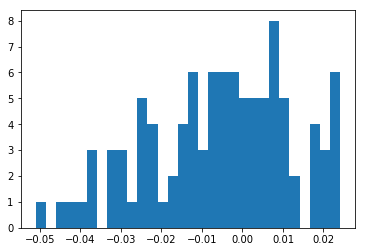

In [59]:
# Distribution of the amount of difference between each model's 
# distance between vectors for man and genius vs woman and genius (200 models)
from matplotlib.pyplot import hist

hist(bais_genius_100, bins=30)

In [60]:
with open('ny_bais_genius.txt', 'w') as f:
    for bais in bais_genius_100:
        f.write(str(bais))
        f.write("\n")

In [64]:
women_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            women_diffs.append(cosine(ny_models_100[i]['women'], ny_models_100[j]['women']))

In [65]:
min(women_diffs)

0.0623164176940918

In [66]:
max(women_diffs)

0.4752131700515747

In [67]:
np.std(women_diffs)

0.051596714613036346

In [68]:
np.mean(women_diffs)

0.24107247485054864

(array([  18.,   44.,  100.,   76.,  154.,  172.,  226.,  254.,  238.,
         402.,  562.,  990., 1306., 1392., 1184., 1012.,  662.,  428.,
         280.,  176.,   96.,   44.,   44.,   26.,    4.,    2.,    4.,
           2.,    0.,    2.]),
 array([0.06231642, 0.07607964, 0.08984287, 0.10360609, 0.11736932,
        0.13113254, 0.14489577, 0.15865899, 0.17242222, 0.18618544,
        0.19994867, 0.21371189, 0.22747512, 0.24123834, 0.25500157,
        0.26876479, 0.28252802, 0.29629124, 0.31005447, 0.32381769,
        0.33758092, 0.35134414, 0.36510737, 0.37887059, 0.39263382,
        0.40639704, 0.42016027, 0.43392349, 0.44768672, 0.46144994,
        0.47521317]),
 <a list of 30 Patch objects>)

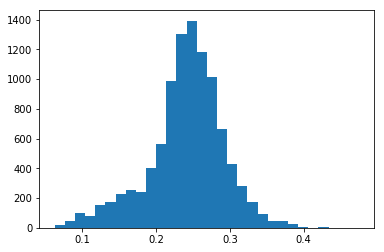

In [70]:
hist(women_diffs, bins=30)

In [71]:
def bais_genius_plural(model):
    man_diff = cosine(model['men'], model['genius'])
    woman_diff = cosine(model['women'], model['genius'])
    return man_diff - woman_diff

In [72]:
bais_genius_plural_100 = []
for model in ny_models_100:
    bais_genius_plural_100.append(bais_genius_plural(model))

In [73]:
min(bais_genius_plural_100)

-0.06560985185205936

In [75]:
min(bais_genius_plural_100) - min(bais_genius_100)

-0.014616379514336586

In [74]:
max(bais_genius_plural_100)

0.041749466210603714

In [76]:
max(bais_genius_plural_100) - max(bais_genius_100)

0.017634082585573196

In [77]:
np.std(bais_genius_plural_100)

0.019172662453379744

In [78]:
np.std(bais_genius_plural_100) - np.std(bais_genius_100)

0.0015762053259061222

In [79]:
np.mean(bais_genius_plural_100)

0.0031409794092178344

In [80]:
np.mean(bais_genius_plural_100) - np.mean(bais_genius_100)

0.00860692709684372

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  5.,  2.,
         6.,  7.,  6.,  5.,  5.,  5.,  4.,  7., 10.,  8.,  9.,  4.,  6.,
         2.,  2.,  0.,  3.]),
 array([-0.06560985, -0.06203121, -0.05845256, -0.05487392, -0.05129528,
        -0.04771663, -0.04413799, -0.04055934, -0.0369807 , -0.03340206,
        -0.02982341, -0.02624477, -0.02266612, -0.01908748, -0.01550884,
        -0.01193019, -0.00835155, -0.0047729 , -0.00119426,  0.00238438,
         0.00596303,  0.00954167,  0.01312031,  0.01669896,  0.0202776 ,
         0.02385625,  0.02743489,  0.03101353,  0.03459218,  0.03817082,
         0.04174947]),
 <a list of 30 Patch objects>)

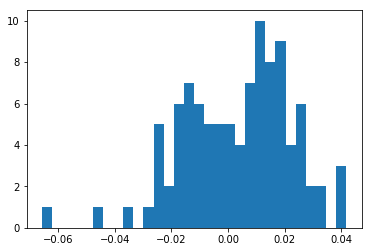

In [81]:
hist(bais_genius_plural_100, bins=30)

In [82]:
woman_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            woman_diffs.append(cosine(ny_models_100[i]['woman'], ny_models_100[j]['woman']))

In [83]:
max(woman_diffs)

0.5091082453727722

In [84]:
max(woman_diffs) - max(women_diffs)

0.03389507532119751

In [85]:
min(woman_diffs)

0.045577168464660645

In [86]:
np.std(woman_diffs)

0.05595145826099913

In [87]:
np.mean(woman_diffs)

0.26088964064915976

In [88]:
# social has a word count of 1952
social_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            social_diffs.append(cosine(ny_models_100[i]['social'], ny_models_100[j]['social']))

(array([  12.,   26.,   42.,   50.,   72.,   88.,  104.,  152.,  164.,
         224.,  274.,  408.,  618.,  842., 1012., 1068., 1086.,  974.,
         856.,  654.,  414.,  286.,  218.,  124.,   60.,   40.,   12.,
          14.,    4.,    2.]),
 array([0.06806856, 0.07809333, 0.08811809, 0.09814286, 0.10816762,
        0.11819238, 0.12821715, 0.13824191, 0.14826668, 0.15829144,
        0.16831621, 0.17834097, 0.18836573, 0.1983905 , 0.20841526,
        0.21844003, 0.22846479, 0.23848955, 0.24851432, 0.25853908,
        0.26856385, 0.27858861, 0.28861338, 0.29863814, 0.3086629 ,
        0.31868767, 0.32871243, 0.3387372 , 0.34876196, 0.35878672,
        0.36881149]),
 <a list of 30 Patch objects>)

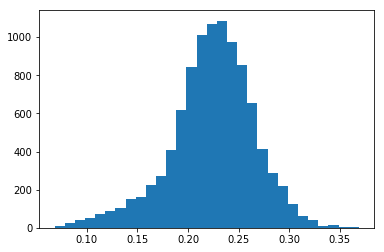

In [89]:
hist(social_diffs, bins=30)

In [90]:
# 'the' has a word count of 428535
the_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            the_diffs.append(cosine(ny_models_100[i]['the'], ny_models_100[j]['the']))

(array([  10.,    8.,   22.,   26.,   50.,   48.,   54.,  122.,  114.,
         138.,  184.,  222.,  182.,  286.,  496.,  704.,  920., 1084.,
        1218., 1118.,  988.,  744.,  502.,  314.,  184.,   86.,   46.,
          18.,    6.,    6.]),
 array([0.11051917, 0.12250096, 0.13448276, 0.14646455, 0.15844634,
        0.17042814, 0.18240993, 0.19439172, 0.20637352, 0.21835531,
        0.2303371 , 0.2423189 , 0.25430069, 0.26628248, 0.27826428,
        0.29024607, 0.30222786, 0.31420966, 0.32619145, 0.33817324,
        0.35015504, 0.36213683, 0.37411862, 0.38610042, 0.39808221,
        0.410064  , 0.4220458 , 0.43402759, 0.44600938, 0.45799117,
        0.46997297]),
 <a list of 30 Patch objects>)

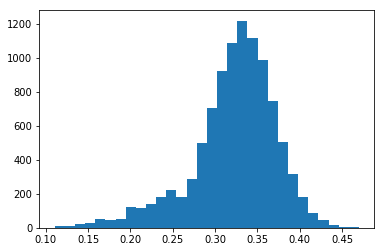

In [91]:
hist(the_diffs, bins=30)

In [92]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=False)[0]

('micromanagement', 1)

In [93]:
micromanagement_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            micromanagement_diffs.append(cosine(ny_models_100[i]['micromanagement'], ny_models_100[j]['micromanagement']))

(array([  4.,   8.,   4.,  46.,  50.,  96., 194., 304., 432., 590., 700.,
        860., 946., 972., 938., 828., 754., 570., 490., 350., 248., 182.,
        132.,  84.,  46.,  30.,  26.,  10.,   4.,   2.]),
 array([0.19343609, 0.21296803, 0.23249998, 0.25203193, 0.27156388,
        0.29109583, 0.31062778, 0.33015972, 0.34969167, 0.36922362,
        0.38875557, 0.40828752, 0.42781947, 0.44735141, 0.46688336,
        0.48641531, 0.50594726, 0.52547921, 0.54501116, 0.56454311,
        0.58407505, 0.603607  , 0.62313895, 0.6426709 , 0.66220285,
        0.6817348 , 0.70126674, 0.72079869, 0.74033064, 0.75986259,
        0.77939454]),
 <a list of 30 Patch objects>)

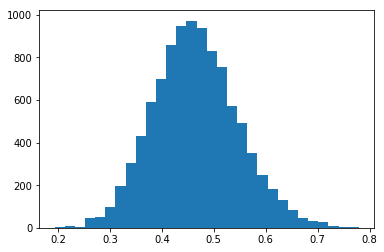

In [94]:
hist(micromanagement_diffs, bins=30)

In [106]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=False)[100000]

('unionized', 16)

In [107]:
# 'unionized', 16

unionized_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            unionized_diffs.append(cosine(ny_models_100[i]['unionized'], ny_models_100[j]['unionized']))

(array([  14.,   44.,   54.,  108.,  148.,  182.,  284.,  366.,  496.,
         710.,  790.,  946.,  940., 1012.,  840.,  772.,  672.,  530.,
         384.,  234.,  148.,   92.,   40.,   38.,   30.,   12.,    2.,
           4.,    2.,    6.]),
 array([0.1210584 , 0.13174947, 0.14244053, 0.15313159, 0.16382265,
        0.17451372, 0.18520478, 0.19589584, 0.20658691, 0.21727797,
        0.22796903, 0.23866009, 0.24935116, 0.26004222, 0.27073328,
        0.28142434, 0.29211541, 0.30280647, 0.31349753, 0.32418859,
        0.33487966, 0.34557072, 0.35626178, 0.36695284, 0.37764391,
        0.38833497, 0.39902603, 0.40971709, 0.42040816, 0.43109922,
        0.44179028]),
 <a list of 30 Patch objects>)

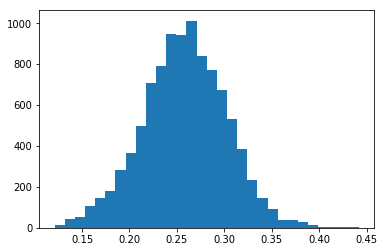

In [108]:
hist(unionized_diffs, bins=30)